# Note: this script is written for a R kernal

# Loading required packages

In [1]:
suppressPackageStartupMessages(library(seasonal))
suppressPackageStartupMessages(library(seasonalview))
suppressPackageStartupMessages(library(Microsoft365R))
suppressPackageStartupMessages(library(strucchange))
suppressPackageStartupMessages(library(tseries))
suppressPackageStartupMessages(library(forecast))
suppressPackageStartupMessages(library(seasonal))
suppressPackageStartupMessages(library(seasonalview))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(openxlsx))
suppressPackageStartupMessages(library(readr))
suppressPackageStartupMessages(library(Microsoft365R))
suppressPackageStartupMessages(library(readxl))


# Get files from hard drive

In [2]:
# data <- read.csv("C:/Users/asifr/OneDrive - State of New Mexico/Documents/Project Oil Price/Outputs/dat_pred_un_sea.csv")
data <- read.csv("C:/Users/asifr/OneDrive - The Pennsylvania State University/Documents/GitHub/Project-Oil-Price/Outputs/dat_pred_un_sea.csv")
attach(data)
tail(data)

,Date,nm_oil_price,wti_spot_price,brent_spot_price,dubai_price,index_china_gdp,index_us_gdp,index_cboe_volt,us_unemploy,index_ip_mining,⋯,index_energy,index_metal,index_precious,del_supply_nonopec,del_cap_per,del_world_gdp_per,del_supply_saudi,opec_spare_capacity,oecd_inventory,del_world_consump
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75,2019-07-01,53.05967,56.37000,61.93000,60.89000,98.62271,112.550,15.96016,3.633333,121.8544,⋯,74.73160,78.13417,111.4888,1.53,-0.36,2.93,-1.10,2.28,4486.731,-13.69
76,2019-10-01,55.21514,56.95667,63.41000,61.43000,98.92269,112.963,13.98578,3.600000,121.0686,⋯,76.12333,76.71421,112.2236,1.84,0.58,2.42,-0.90,2.07,4413.825,-9.22
77,2020-01-01,44.82860,45.75667,50.44000,50.67333,94.94974,113.418,31.22452,3.800000,119.5387,⋯,61.67127,73.14166,118.2904,2.45,1.45,-1.42,-0.20,2.78,4456.017,-7.87
78,2020-04-01,21.88104,27.80667,29.34333,31.65667,100.54137,112.993,34.49365,12.966667,94.8394,⋯,39.80078,69.07885,125.6044,-3.94,-4.93,-8.45,-0.64,5.49,4736.159,0.27
79,2020-07-01,38.45007,40.89333,42.96333,42.48333,101.32336,113.971,25.80891,8.833333,97.4152,⋯,52.37344,82.56187,146.2935,-3.88,-4.35,-2.09,-0.61,6.98,4763.088,11.34
80,2020-10-01,40.07100,42.45333,44.29000,43.84667,101.75198,114.692,25.62172,6.766667,99.7417,⋯,56.88976,91.80764,143.9547,-4.61,-4.69,-0.22,-0.82,6.22,4630.884,6.49


# Creating timese-series variables

In [3]:
nm_oil_price <- cbind(ts(data[2], start = 2001, end = 2020, frequency =4))
wti_spot_price <- cbind(ts(data[3], start = 2001, end = 2020, frequency =4))
brent_spot_price <- cbind(ts(data[4], start = 2001, end = 2020, frequency =4))
dubai_price <- cbind(ts(data[5], start = 2001, end = 2020, frequency =4))
index_china_gdp <- cbind(ts(data[6], start = 2001, end = 2020, frequency =4))
index_us_gdp <- cbind(ts(data[7], start = 2001, end = 2020, frequency =4))
index_cboe_volt <- cbind(ts(data[8], start = 2001, end = 2020, frequency =4))
us_unemploy <- cbind(ts(data[9], start = 2001, end = 2020, frequency =4))
index_ip_mining <- cbind(ts(data[10], start = 2001, end = 2020, frequency =4))
index_cpi_china <- cbind(ts(data[11], start = 2001, end = 2020, frequency =4))
opec <- cbind(ts(data[12], start = 2001, end = 2020, frequency =4))
non_opec <- cbind(ts(data[13], start = 2001, end = 2020, frequency =4))
index_cpi_us <- cbind(ts(data[14], start = 2001, end = 2020, frequency =4))
index_energy <- cbind(ts(data[15], start = 2001, end = 2020, frequency =4))
index_metal <- cbind(ts(data[16], start = 2001, end = 2020, frequency =4))
index_precious <- cbind(ts(data[17], start = 2001, end = 2020, frequency =4))
del_supply_nonopec <- cbind(ts(data[18], start = 2001, end = 2020, frequency =4))
del_cap_per <- cbind(ts(data[19], start = 2001, end = 2020, frequency =4))
del_world_gdp_per <- cbind(ts(data[20], start = 2001, end = 2020, frequency =4))
del_supply_saudi <- cbind(ts(data[21], start = 2001, end = 2020, frequency =4))
opec_spare_capacity <- cbind(ts(data[22], start = 2001, end = 2020, frequency =4))
oecd_inventory <- cbind(ts(data[23], start = 2001, end = 2020, frequency =4))
del_world_consump <- cbind(ts(data[24], start = 2001, end = 2020, frequency =4))

# Plotting the adjustment results

## nm_oil_price

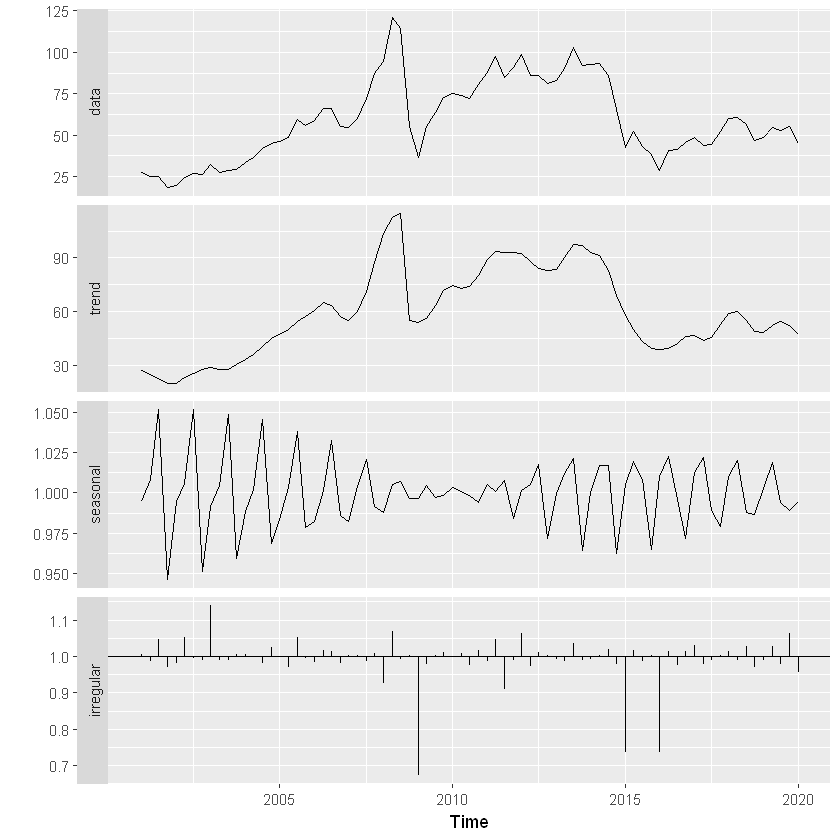


	Ljung-Box test

data:  Residuals
Q* = 6.5764, df = 8, p-value = 0.5829

Model df: 0.   Total lags used: 8



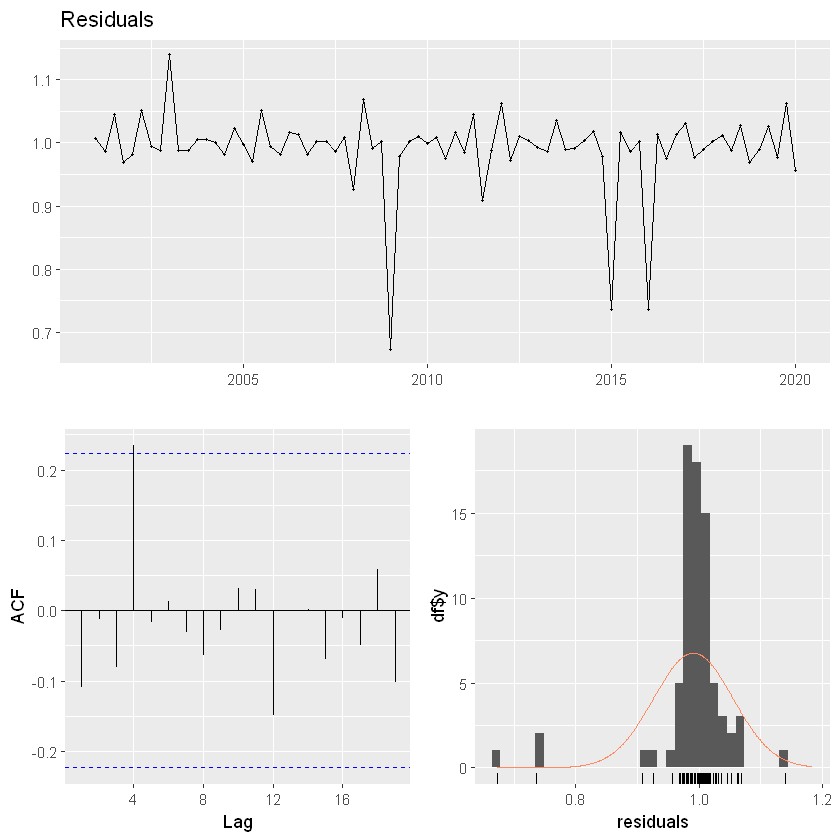

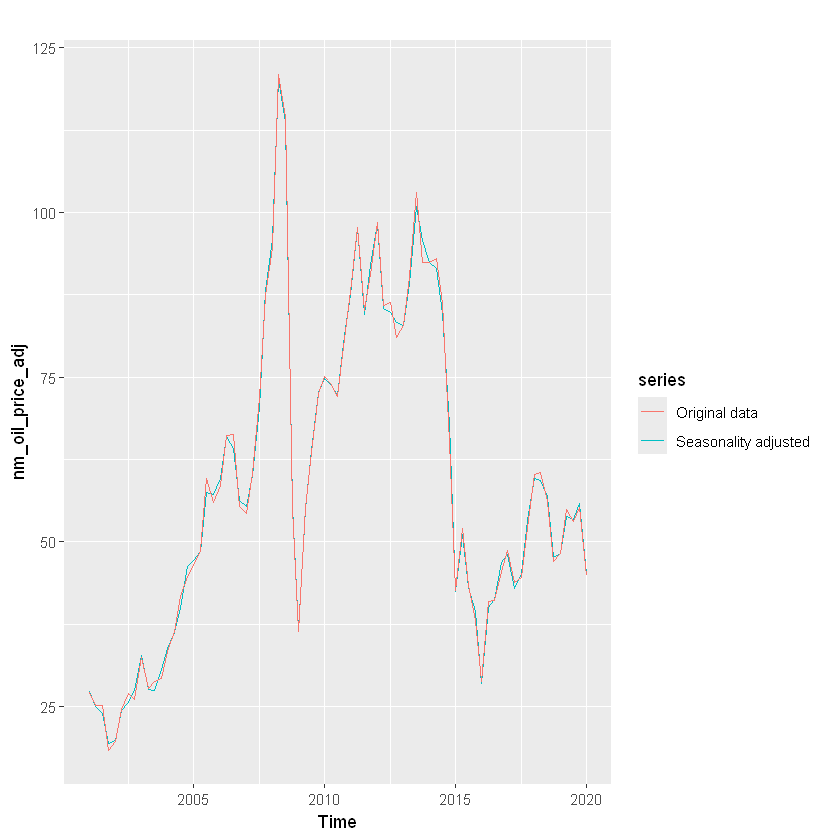

In [4]:
nm_oil_price_adj <- as.data.frame(as_tibble(seas(nm_oil_price, x11 = "")))
nm_oil_price_adj <- cbind(ts(nm_oil_price_adj[2], start = 2001, end = 2020, frequency =4))

OUT <- createWorkbook()
addWorksheet(OUT, "nm_oil_price")

autoplot(seas(nm_oil_price, x11=""))
OUT %>% insertPlot(sheet = "nm_oil_price", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(nm_oil_price, x11="")))
OUT %>% insertPlot(sheet = "nm_oil_price", startRow = 2, startCol = "J")

autoplot(nm_oil_price_adj, series = "Seasonality adjusted") +
  autolayer(nm_oil_price, series = "Original data")
OUT %>% insertPlot(sheet = "nm_oil_price", startRow = 2, startCol = "R")

nm_oil_price_adj <- as.data.frame(as_tibble(seas(nm_oil_price, x11 = "")))
nm_oil_price_adj <- cbind(ts(nm_oil_price_adj[2], start = 2001, end = 2020, frequency =4))

## wti_spot_price

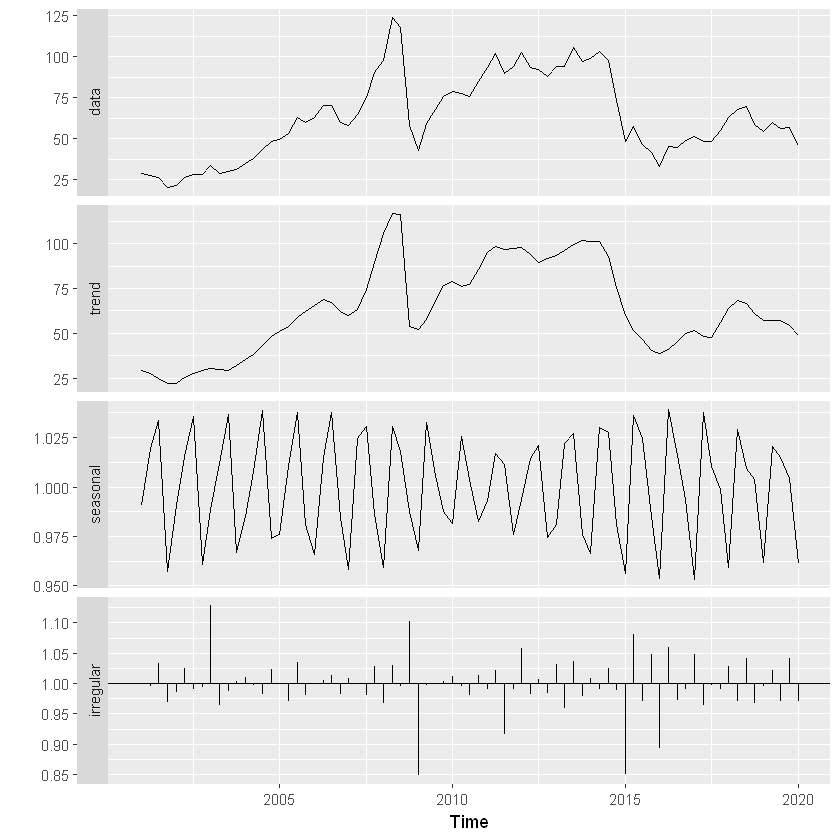


	Ljung-Box test

data:  Residuals
Q* = 33.435, df = 8, p-value = 5.14e-05

Model df: 0.   Total lags used: 8



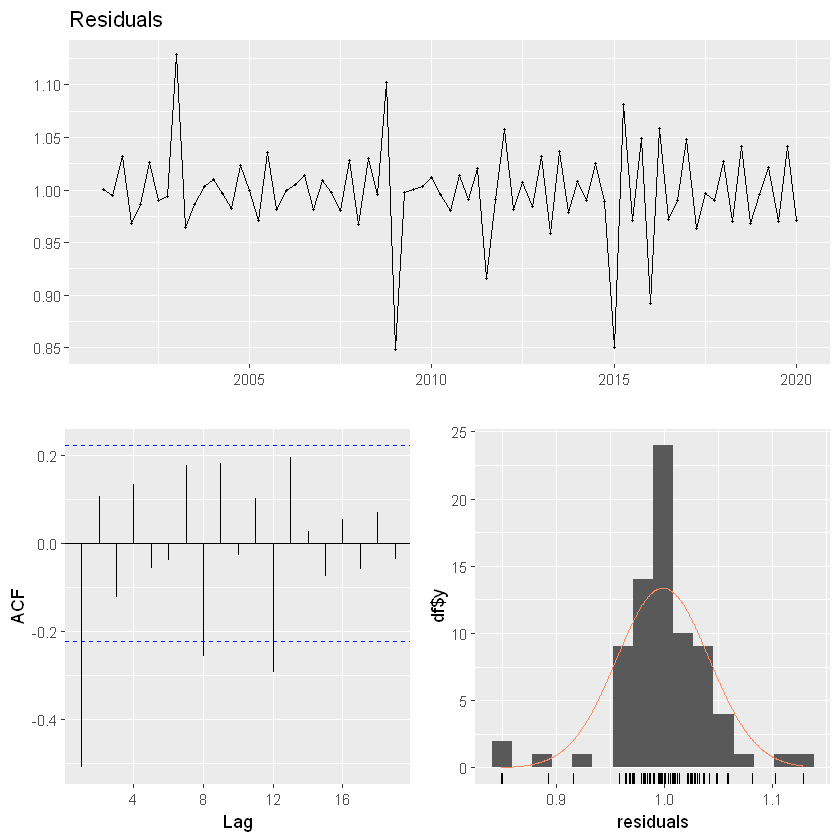

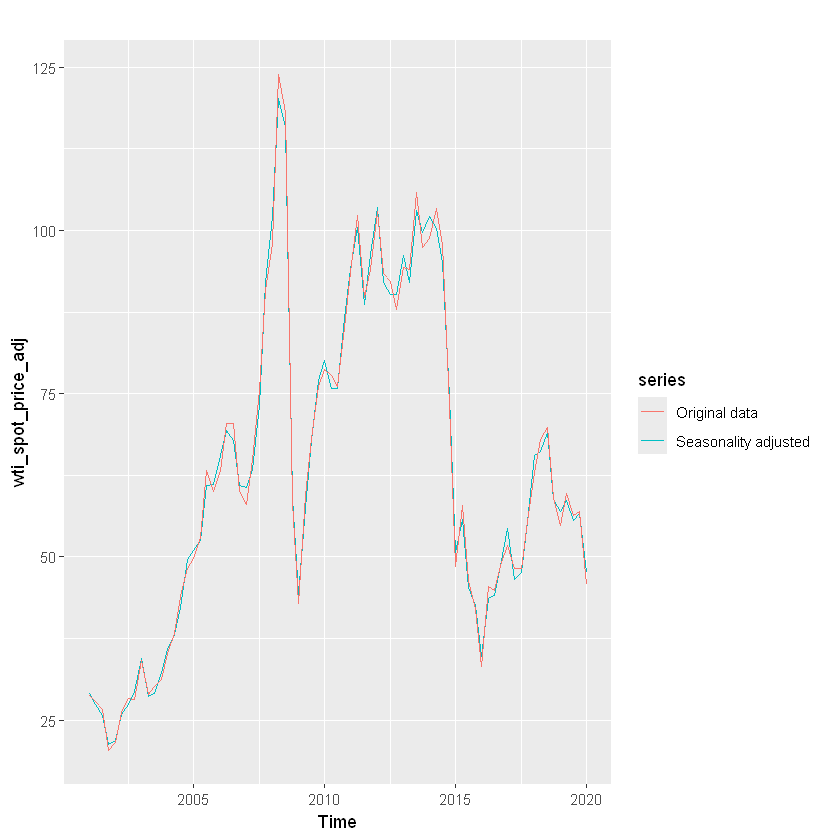

In [5]:
addWorksheet(OUT, "wti_spot_price")

wti_spot_price_adj <- as.data.frame(as_tibble(seas(wti_spot_price, x11 = "")))
wti_spot_price_adj <- cbind(ts(wti_spot_price_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(wti_spot_price, x11=""))
OUT %>% insertPlot(sheet = "wti_spot_price", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(wti_spot_price, x11="")))
OUT %>% insertPlot(sheet = "wti_spot_price", startRow = 2, startCol = "J")

autoplot(wti_spot_price_adj, series = "Seasonality adjusted") +
  autolayer(wti_spot_price, series = "Original data")
OUT %>% insertPlot(sheet = "wti_spot_price", startRow = 2, startCol = "R")

## brent_spot_price

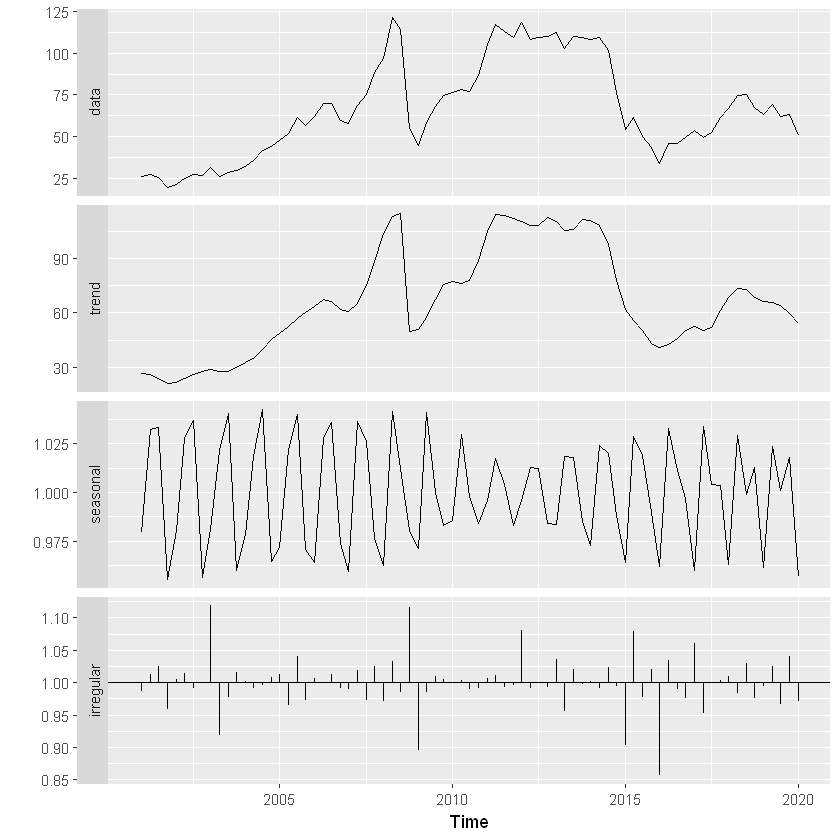


	Ljung-Box test

data:  Residuals
Q* = 28.597, df = 8, p-value = 0.0003731

Model df: 0.   Total lags used: 8



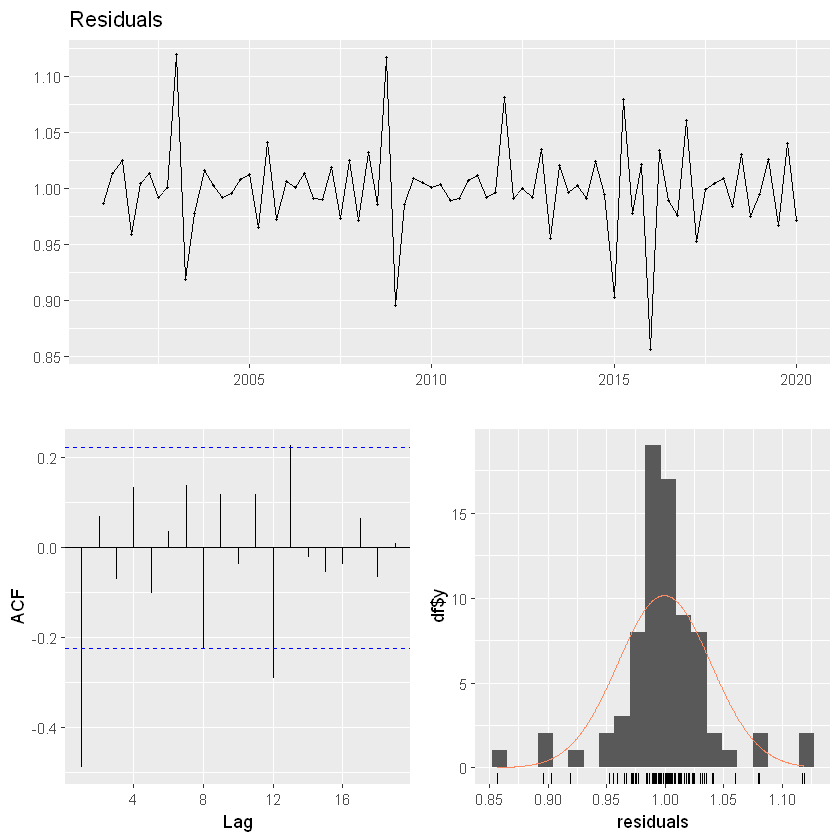

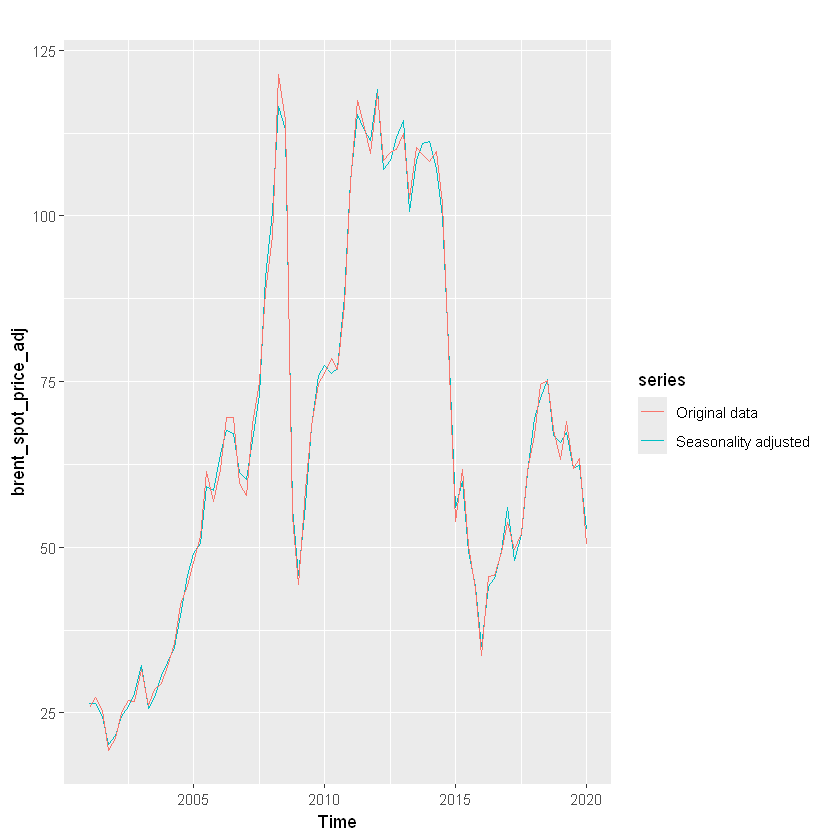

In [6]:
addWorksheet(OUT, "brent_spot_price")

brent_spot_price_adj <- as.data.frame(as_tibble(seas(brent_spot_price, x11 = "")))
brent_spot_price_adj <- cbind(ts(brent_spot_price_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(brent_spot_price, x11=""))
OUT %>% insertPlot(sheet = "brent_spot_price", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(brent_spot_price, x11="")))
OUT %>% insertPlot(sheet = "brent_spot_price", startRow = 2, startCol = "J")

autoplot(brent_spot_price_adj, series = "Seasonality adjusted") +
  autolayer(brent_spot_price, series = "Original data")
OUT %>% insertPlot(sheet = "brent_spot_price", startRow = 2, startCol = "R")

## dubai_price

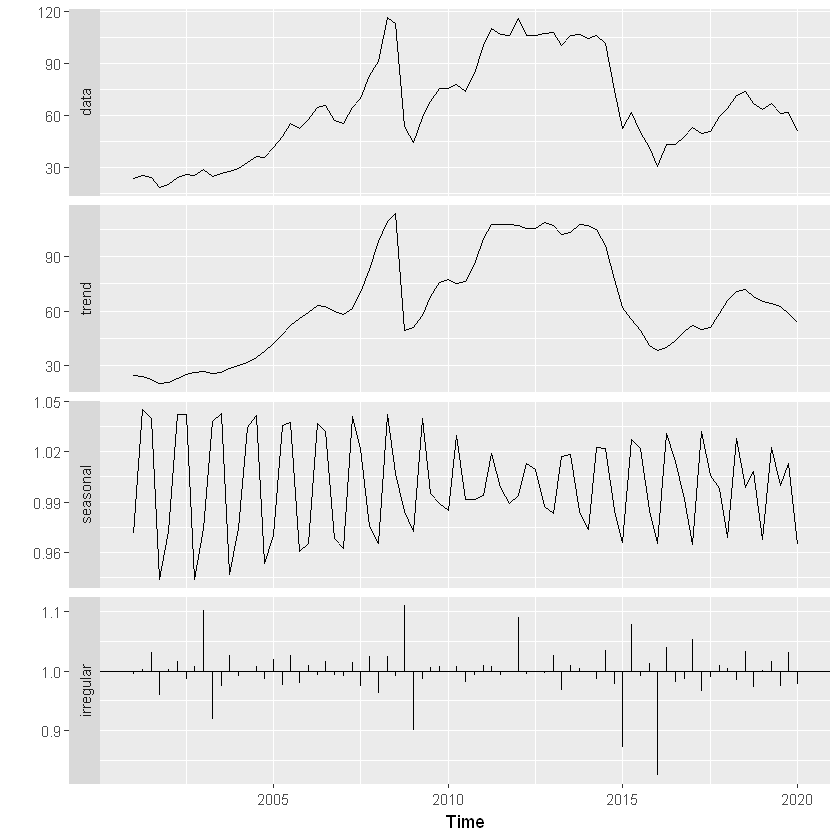


	Ljung-Box test

data:  Residuals
Q* = 19.899, df = 8, p-value = 0.01072

Model df: 0.   Total lags used: 8



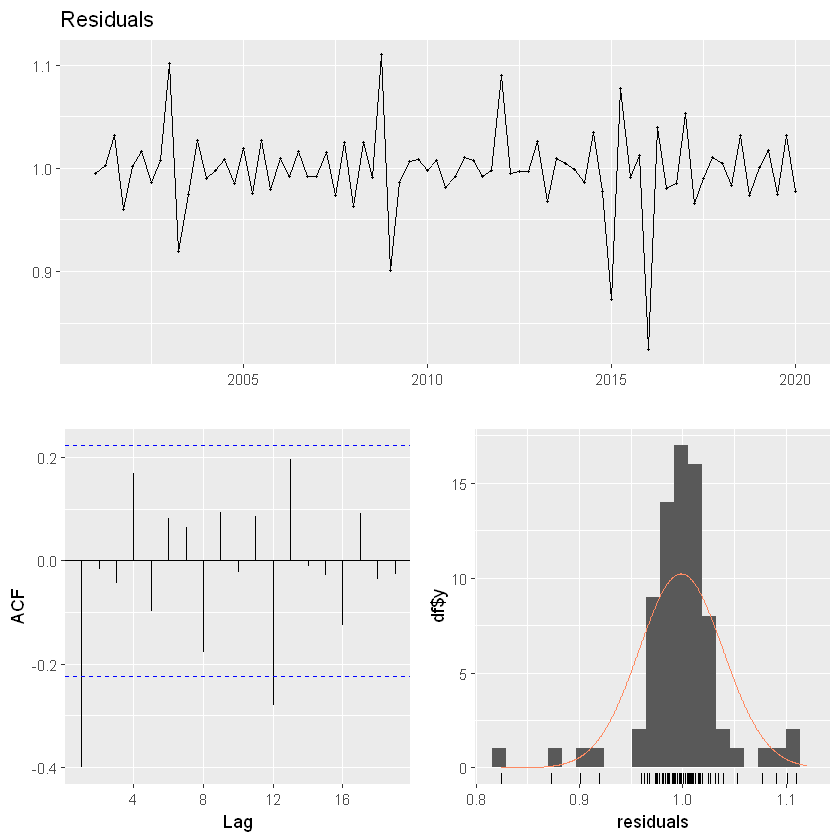

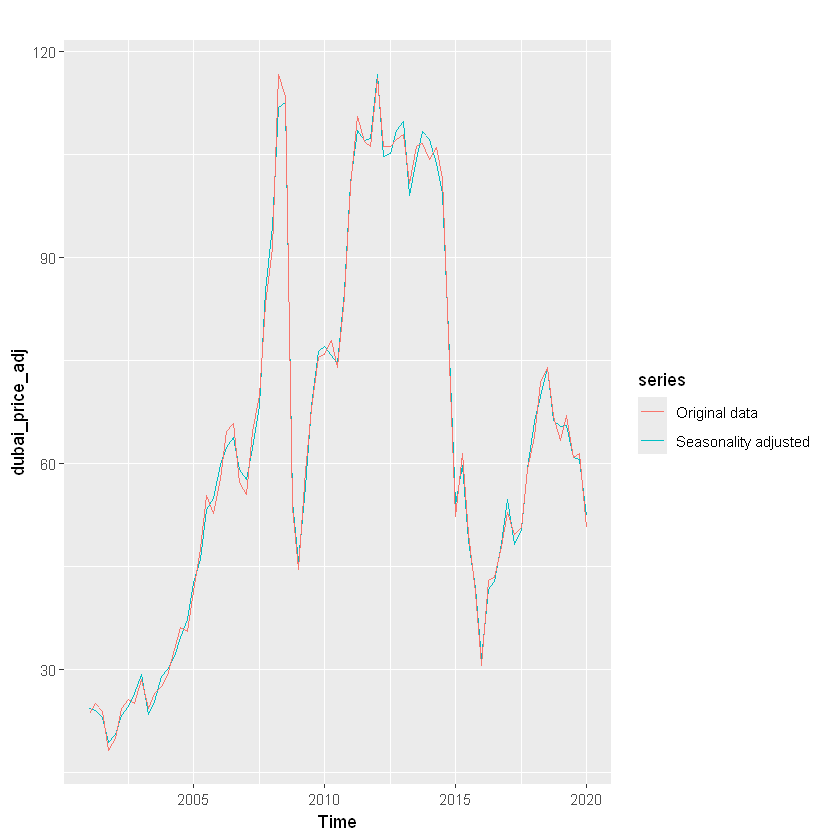

In [7]:
addWorksheet(OUT, "dubai_price")

dubai_price_adj <- as.data.frame(as_tibble(seas(dubai_price, x11 = "")))
dubai_price_adj <- cbind(ts(dubai_price_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(dubai_price, x11=""))
OUT %>% insertPlot(sheet = "dubai_price", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(dubai_price, x11="")))
OUT %>% insertPlot(sheet = "dubai_price", startRow = 2, startCol = "J")

autoplot(dubai_price_adj, series = "Seasonality adjusted") +
  autolayer(dubai_price, series = "Original data")
OUT %>% insertPlot(sheet = "dubai_price", startRow = 2, startCol = "R")

## index_china_gdp

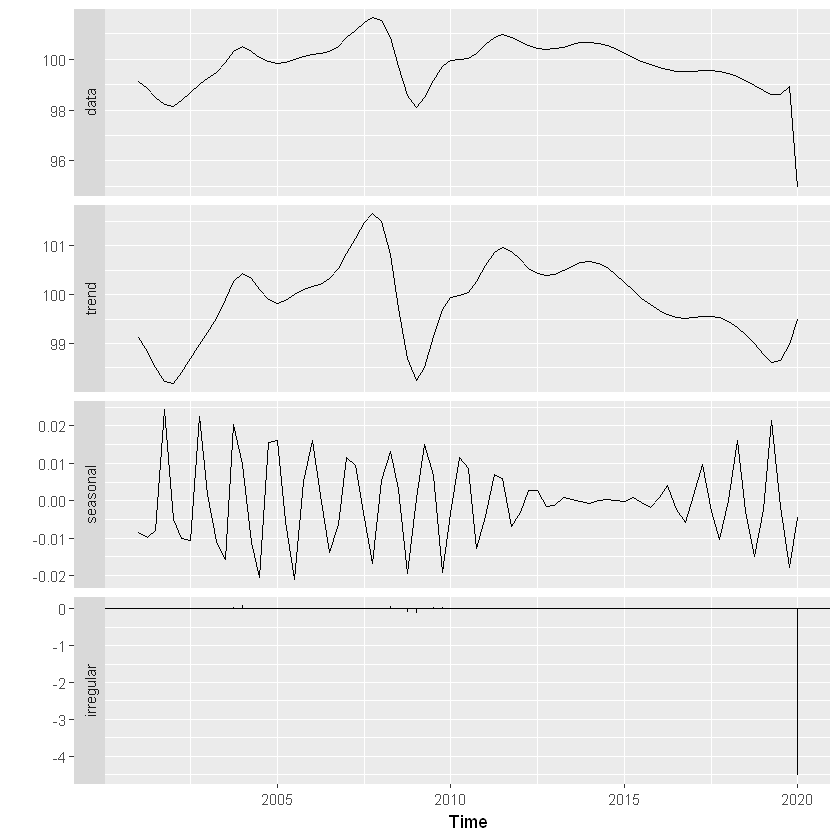


	Ljung-Box test

data:  Residuals
Q* = 0.0070026, df = 8, p-value = 1

Model df: 0.   Total lags used: 8



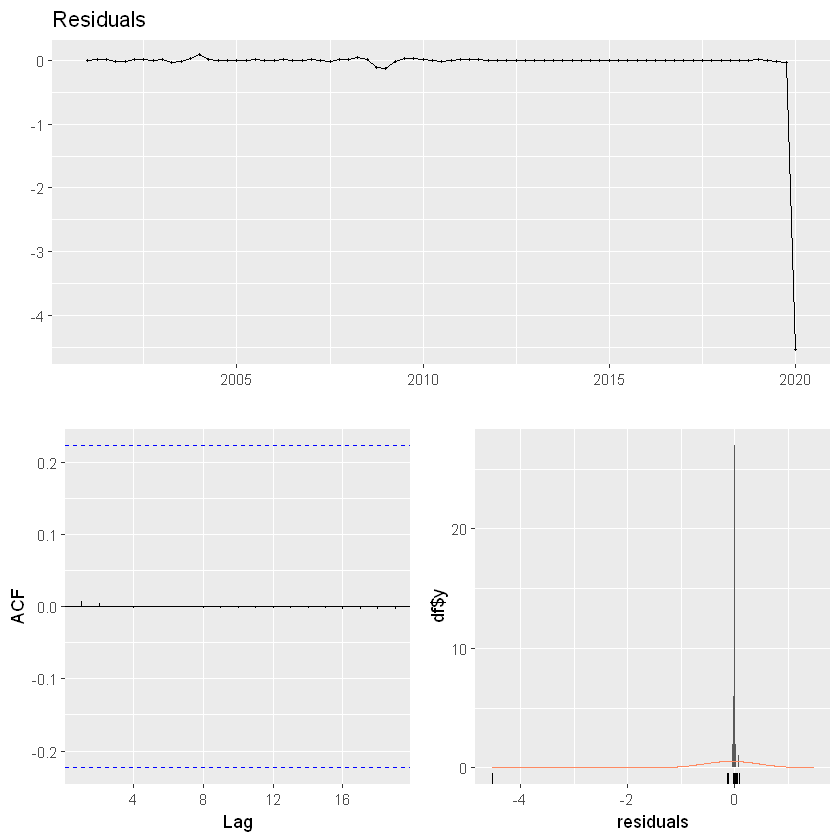

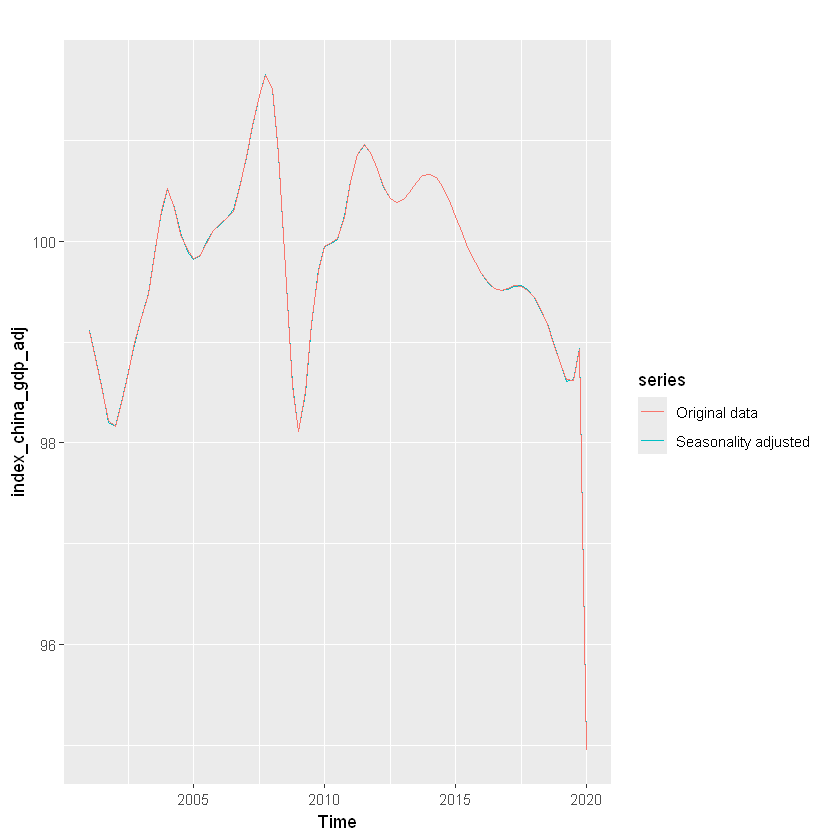

In [8]:
addWorksheet(OUT, "index_china_gdp")

index_china_gdp_adj <- as.data.frame(as_tibble(seas(index_china_gdp, x11 = "")))
index_china_gdp_adj <- cbind(ts(index_china_gdp_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(index_china_gdp, x11=""))
OUT %>% insertPlot(sheet = "index_china_gdp", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(index_china_gdp, x11="")))
OUT %>% insertPlot(sheet = "index_china_gdp", startRow = 2, startCol = "J")

autoplot(index_china_gdp_adj, series = "Seasonality adjusted") +
  autolayer(index_china_gdp, series = "Original data")
OUT %>% insertPlot(sheet = "index_china_gdp", startRow = 2, startCol = "R")

## index_us_gdp

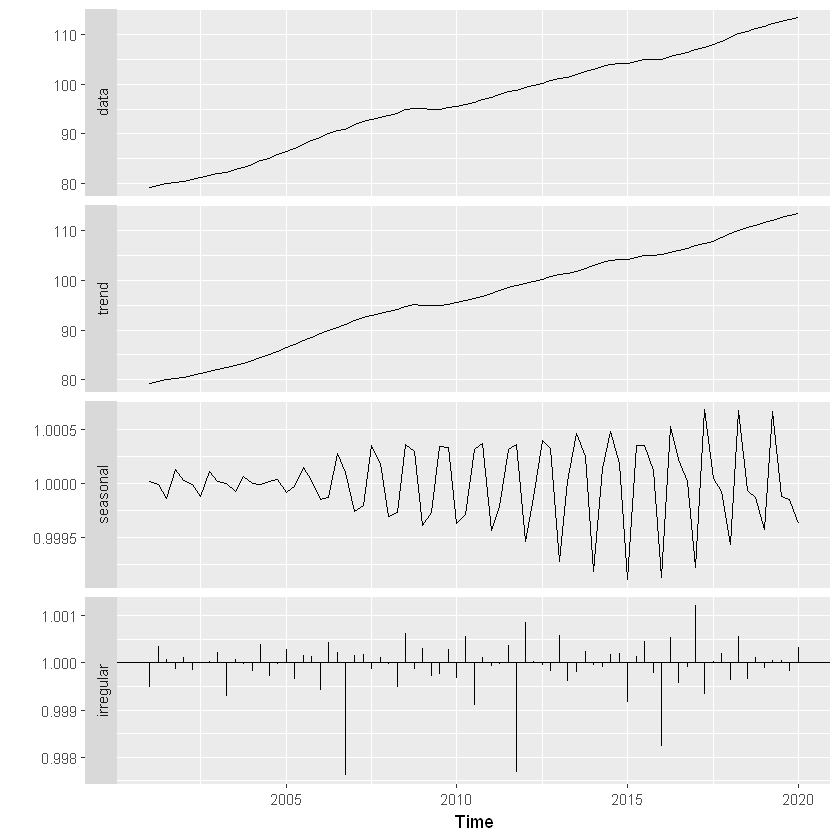


	Ljung-Box test

data:  Residuals
Q* = 20.329, df = 8, p-value = 0.00916

Model df: 0.   Total lags used: 8



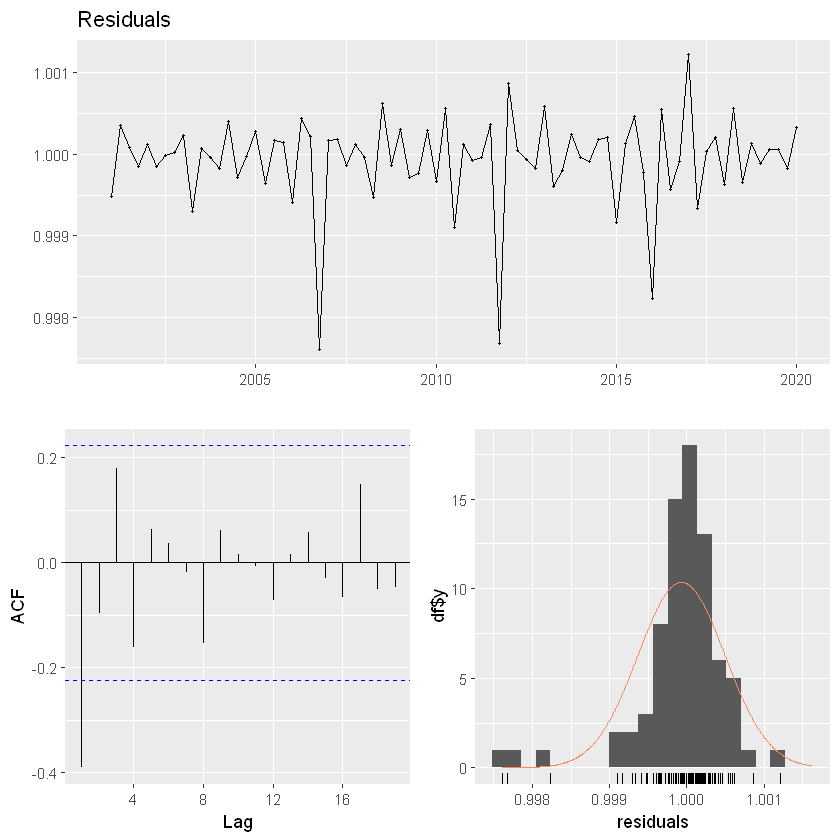

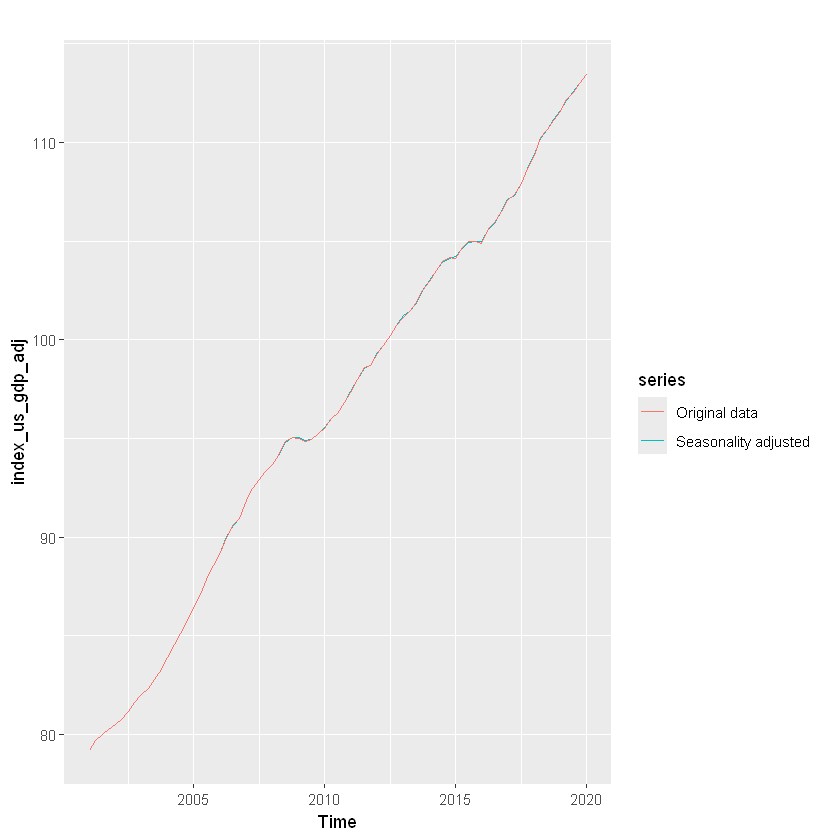

In [9]:
addWorksheet(OUT, "index_us_gdp")

index_us_gdp_adj <- as.data.frame(as_tibble(seas(index_us_gdp, x11 = "")))
index_us_gdp_adj <- cbind(ts(index_us_gdp_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(index_us_gdp, x11=""))
OUT %>% insertPlot(sheet = "index_us_gdp", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(index_us_gdp, x11="")))
OUT %>% insertPlot(sheet = "index_us_gdp", startRow = 2, startCol = "J")

autoplot(index_us_gdp_adj, series = "Seasonality adjusted") +
  autolayer(index_us_gdp, series = "Original data")
OUT %>% insertPlot(sheet = "index_us_gdp", startRow = 2, startCol = "R")

## index_cboe_volt

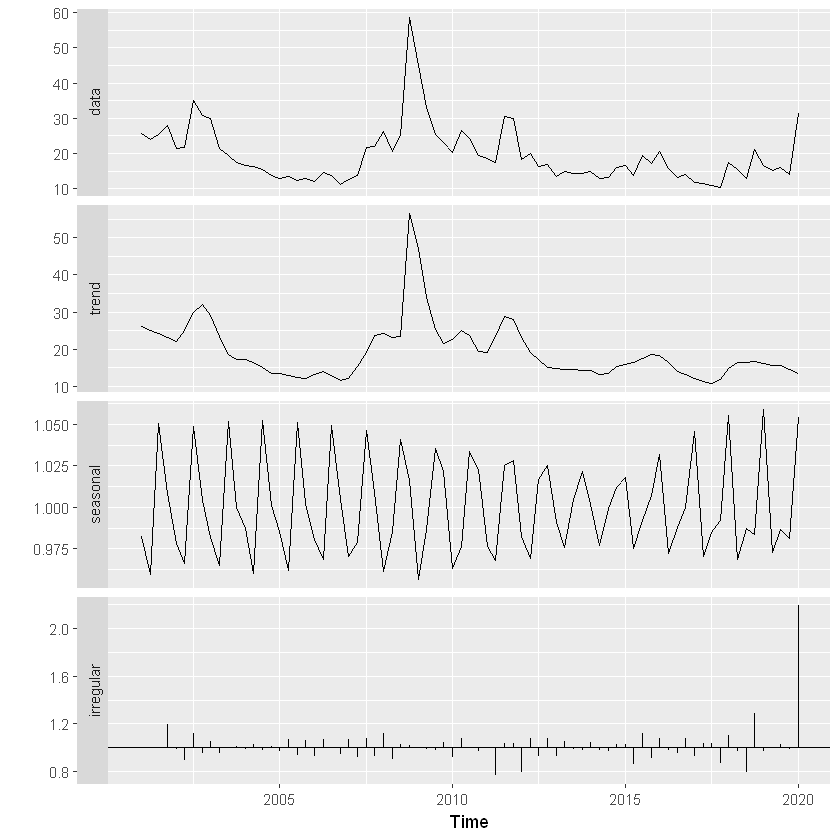


	Ljung-Box test

data:  Residuals
Q* = 9.6041, df = 8, p-value = 0.2939

Model df: 0.   Total lags used: 8



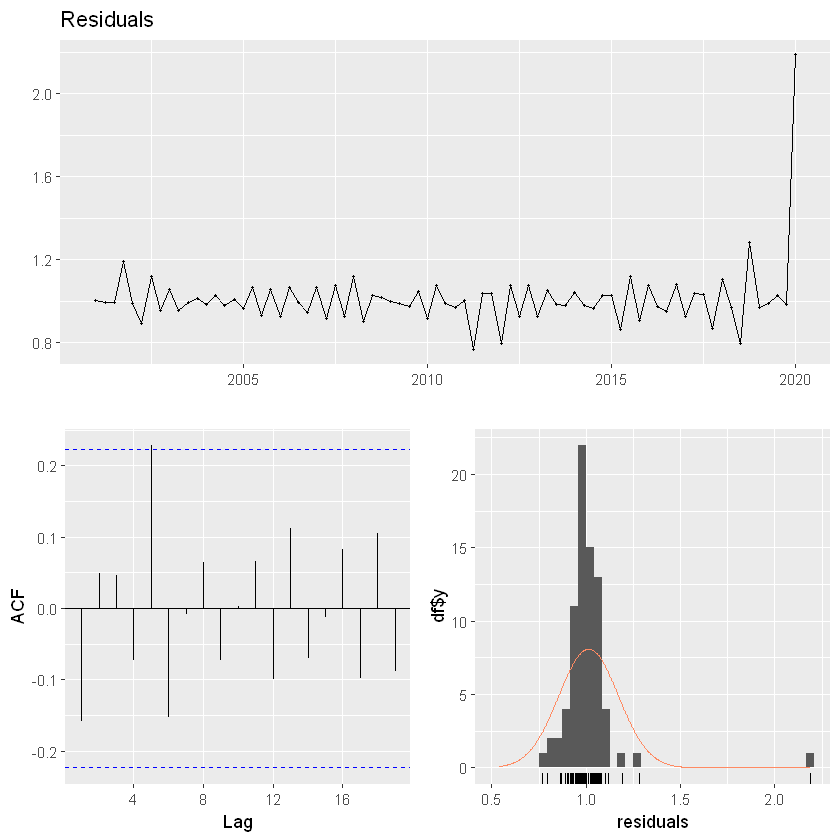

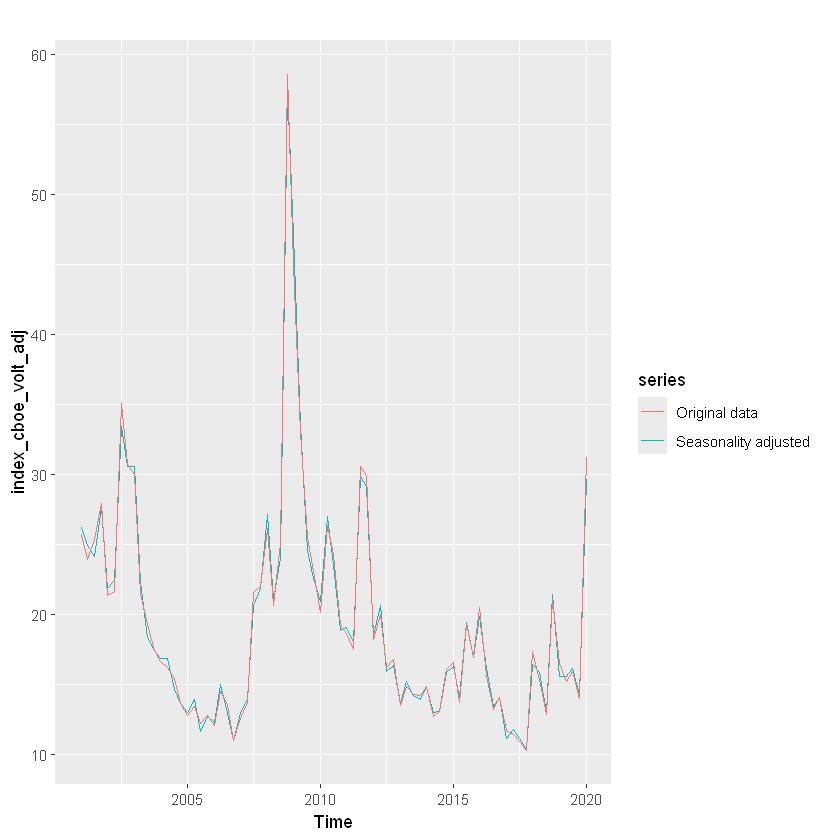

In [10]:
addWorksheet(OUT, "index_cboe_volt")

index_cboe_volt_adj <- as.data.frame(as_tibble(seas(index_cboe_volt, x11 = "")))
index_cboe_volt_adj <- cbind(ts(index_cboe_volt_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(index_cboe_volt, x11=""))
OUT %>% insertPlot(sheet = "index_cboe_volt", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(index_cboe_volt, x11="")))
OUT %>% insertPlot(sheet = "index_cboe_volt", startRow = 2, startCol = "J")

autoplot(index_cboe_volt_adj, series = "Seasonality adjusted") +
  autolayer(index_cboe_volt, series = "Original data")
OUT %>% insertPlot(sheet = "index_cboe_volt", startRow = 2, startCol = "R")

## us_unemploy

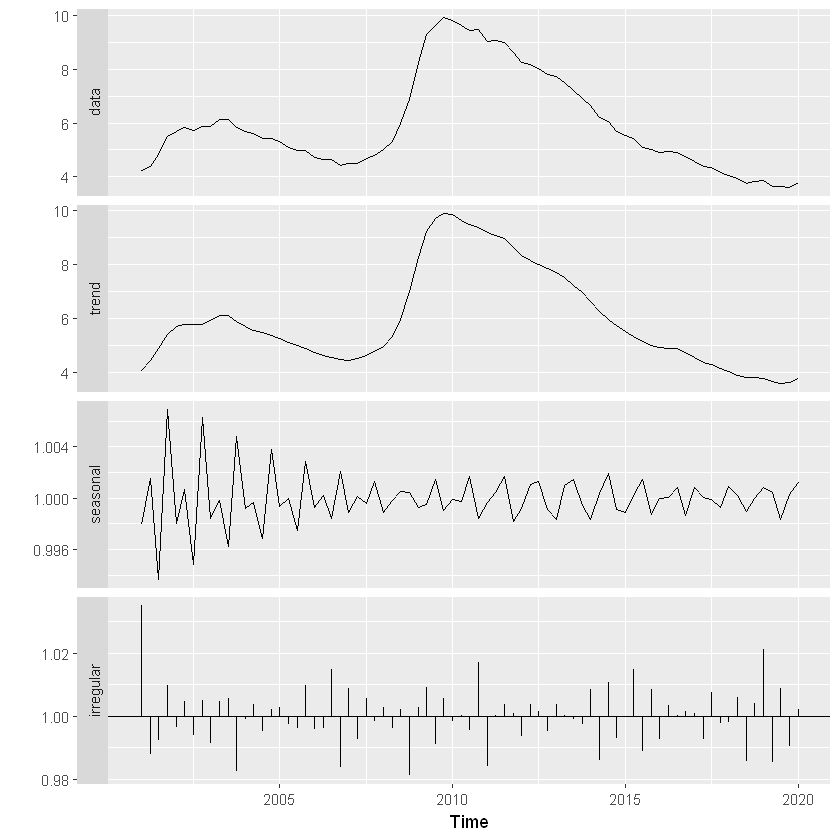


	Ljung-Box test

data:  Residuals
Q* = 29.729, df = 8, p-value = 0.000236

Model df: 0.   Total lags used: 8



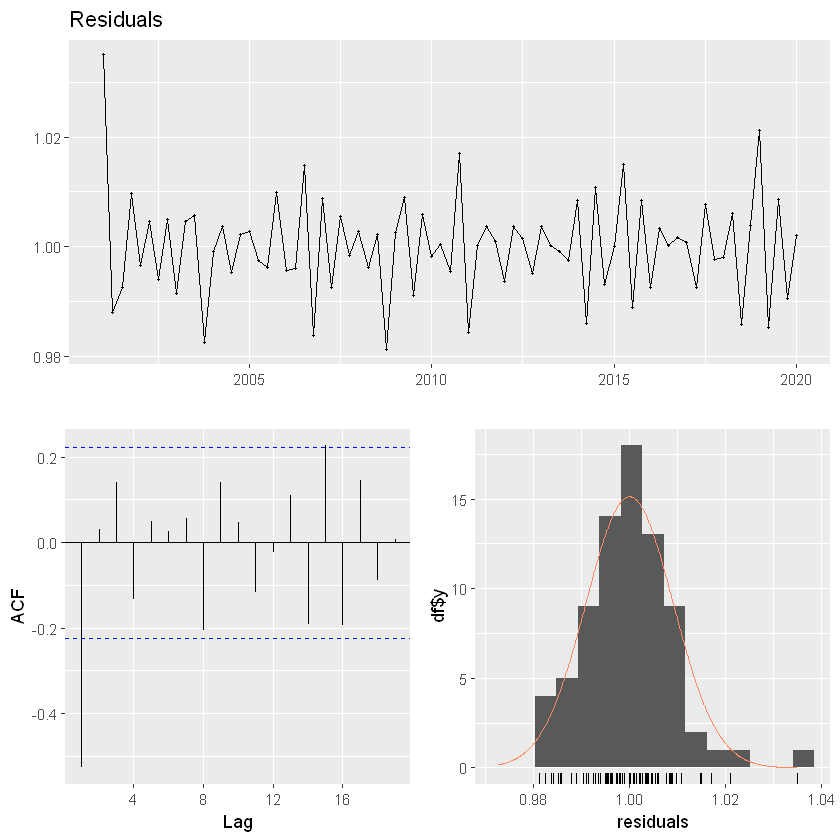

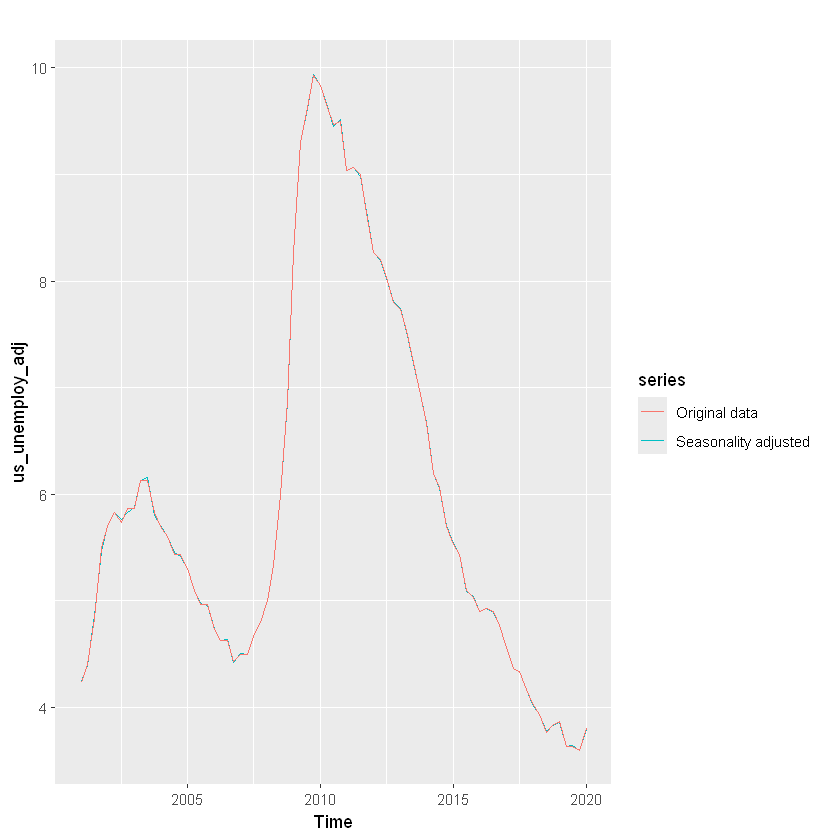

In [11]:
addWorksheet(OUT, "us_unemploy")

us_unemploy_adj <- as.data.frame(as_tibble(seas(us_unemploy, x11 = "")))
us_unemploy_adj <- cbind(ts(us_unemploy_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(us_unemploy, x11=""))
OUT %>% insertPlot(sheet = "us_unemploy", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(us_unemploy, x11="")))
OUT %>% insertPlot(sheet = "us_unemploy", startRow = 2, startCol = "J")

autoplot(us_unemploy_adj, series = "Seasonality adjusted") +
  autolayer(us_unemploy, series = "Original data")
OUT %>% insertPlot(sheet = "us_unemploy", startRow = 2, startCol = "R")

## index_ip_mining

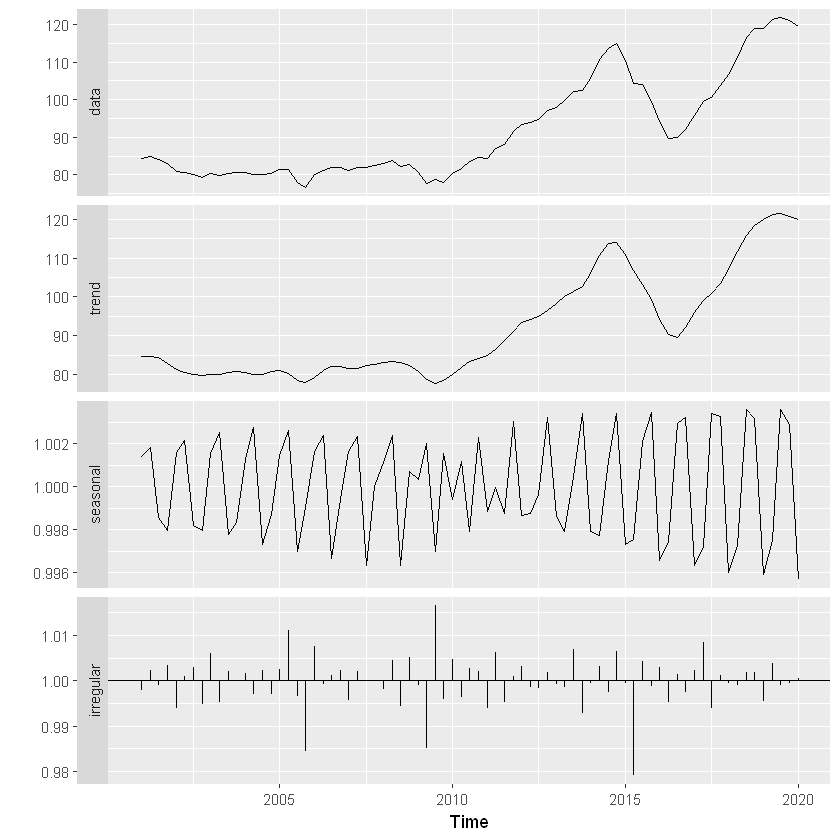


	Ljung-Box test

data:  Residuals
Q* = 25.85, df = 8, p-value = 0.001114

Model df: 0.   Total lags used: 8



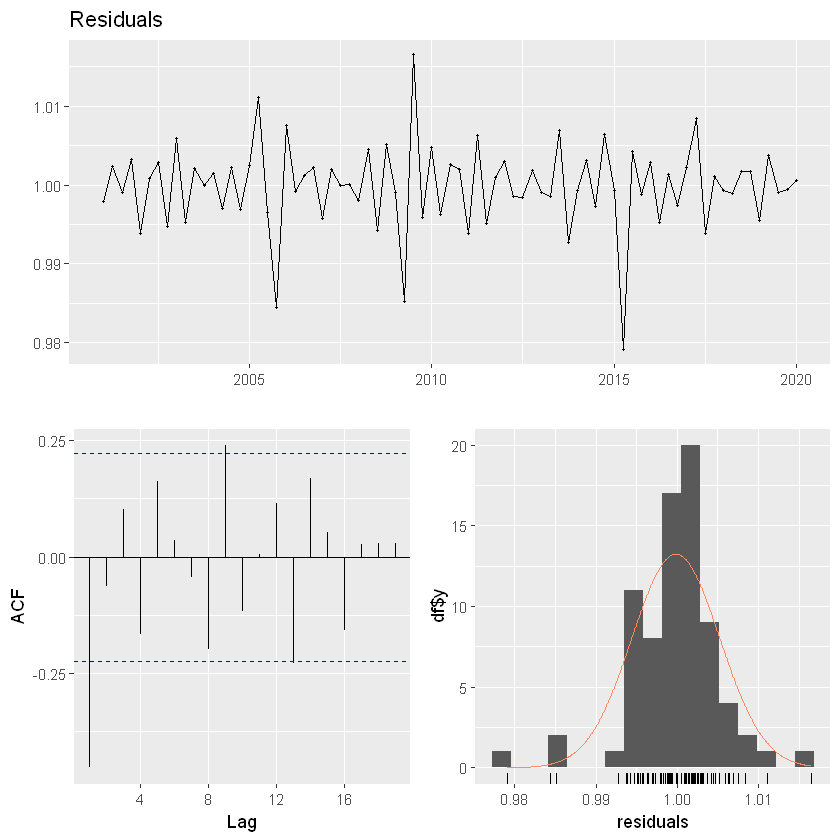

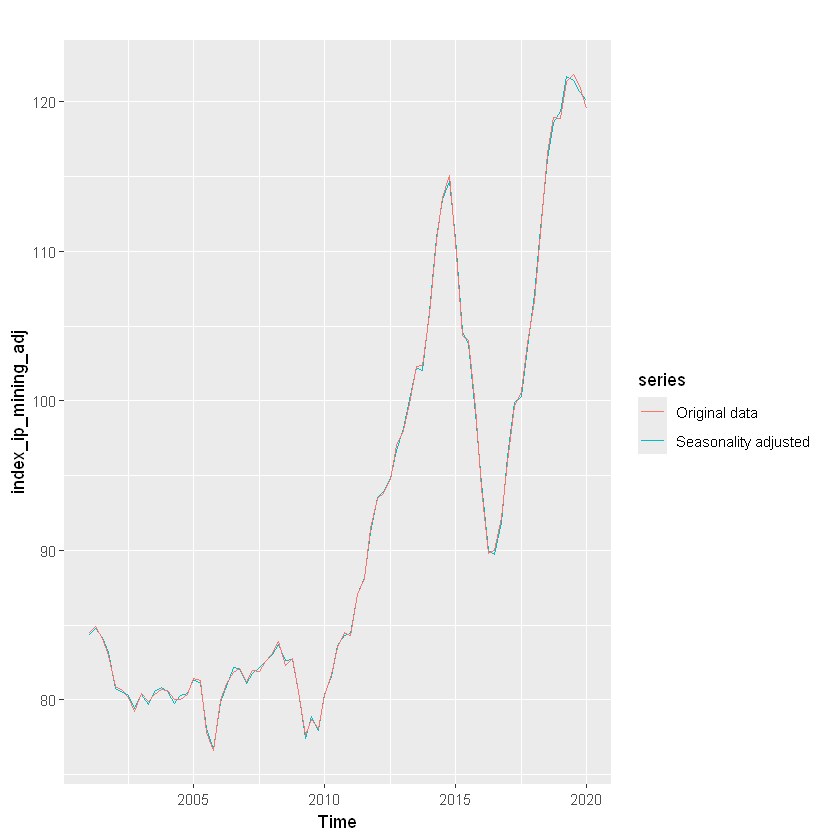

In [12]:
addWorksheet(OUT, "index_ip_mining")

index_ip_mining_adj <- as.data.frame(as_tibble(seas(index_ip_mining, x11 = "")))
index_ip_mining_adj <- cbind(ts(index_ip_mining_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(index_ip_mining, x11=""))
OUT %>% insertPlot(sheet = "index_ip_mining", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(index_ip_mining, x11="")))
OUT %>% insertPlot(sheet = "index_ip_mining", startRow = 2, startCol = "J")

autoplot(index_ip_mining_adj, series = "Seasonality adjusted") +
  autolayer(index_ip_mining, series = "Original data")
OUT %>% insertPlot(sheet = "index_ip_mining", startRow = 2, startCol = "R")

## index_cpi_china

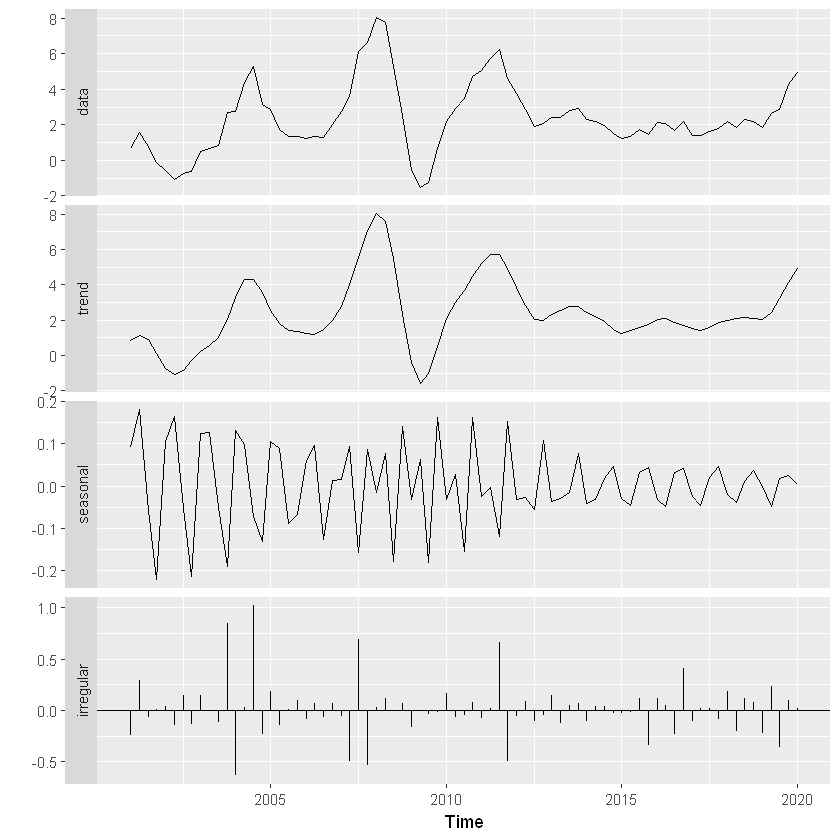


	Ljung-Box test

data:  Residuals
Q* = 44.314, df = 8, p-value = 4.963e-07

Model df: 0.   Total lags used: 8



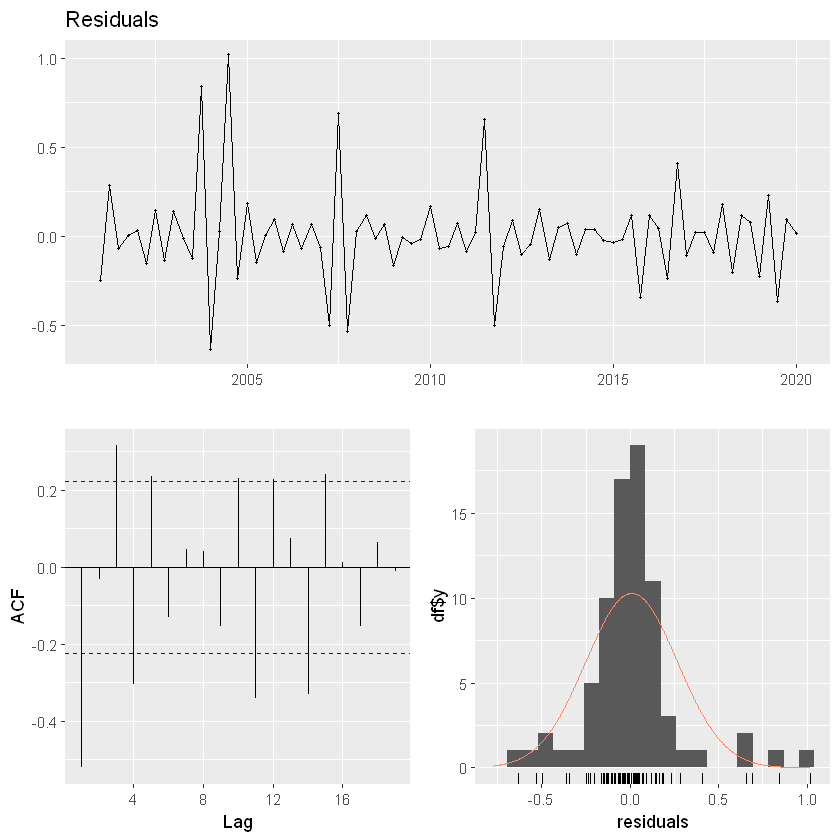

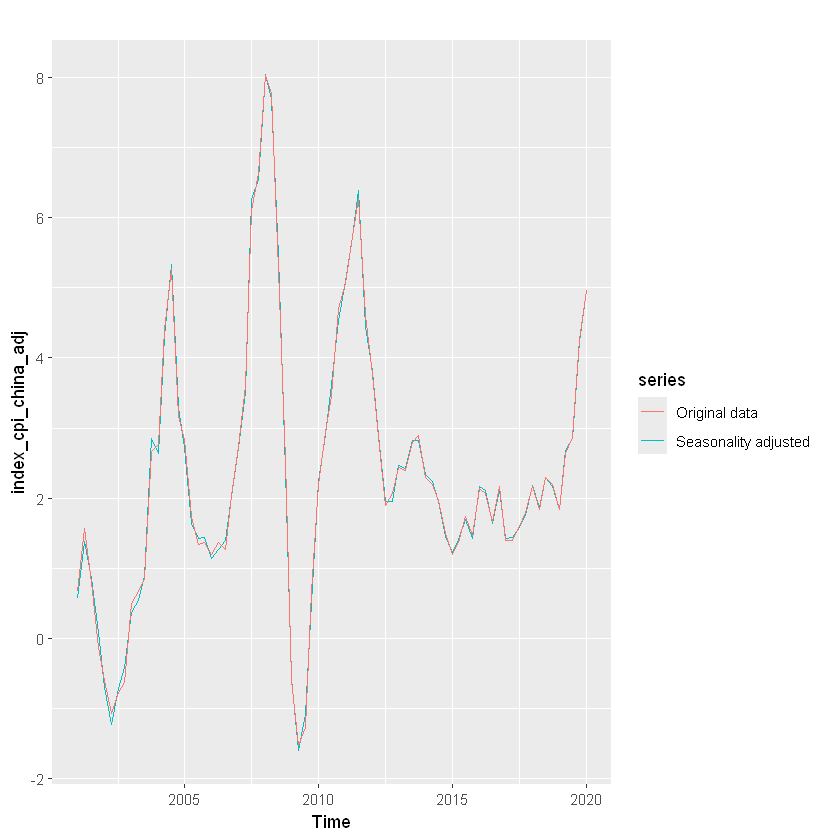

In [13]:
addWorksheet(OUT, "index_cpi_china")

index_cpi_china_adj <- as.data.frame(as_tibble(seas(index_cpi_china, x11 = "")))
index_cpi_china_adj <- cbind(ts(index_cpi_china_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(index_cpi_china, x11=""))
OUT %>% insertPlot(sheet = "index_cpi_china", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(index_cpi_china, x11="")))
OUT %>% insertPlot(sheet = "index_cpi_china", startRow = 2, startCol = "J")

autoplot(index_cpi_china_adj, series = "Seasonality adjusted") +
  autolayer(index_cpi_china, series = "Original data")
OUT %>% insertPlot(sheet = "index_cpi_china", startRow = 2, startCol = "R")

## opec

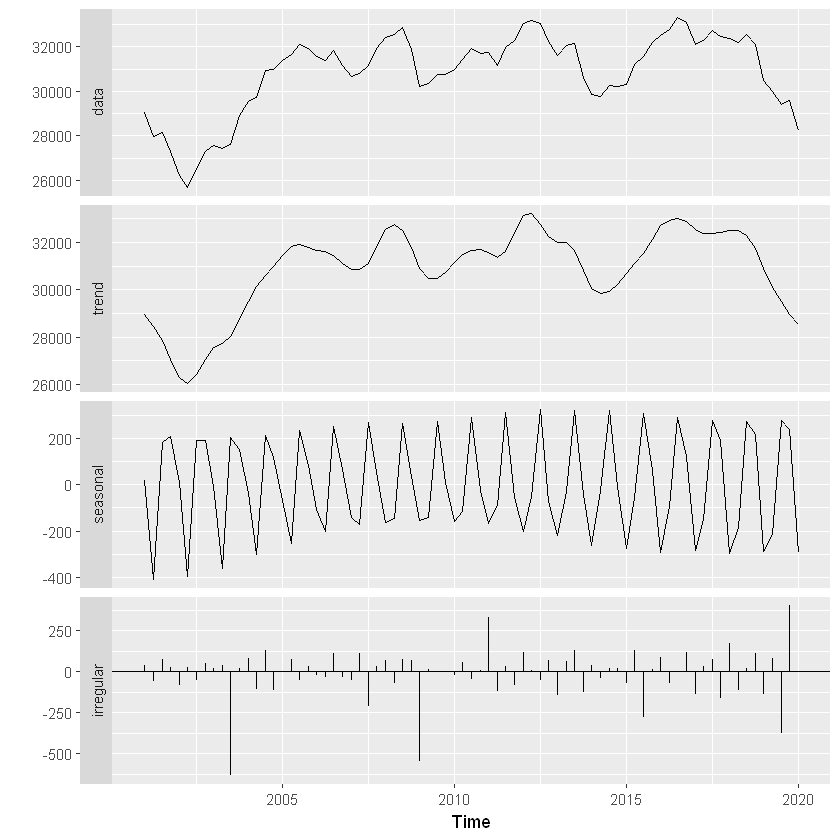


	Ljung-Box test

data:  Residuals
Q* = 18.741, df = 8, p-value = 0.01631

Model df: 0.   Total lags used: 8



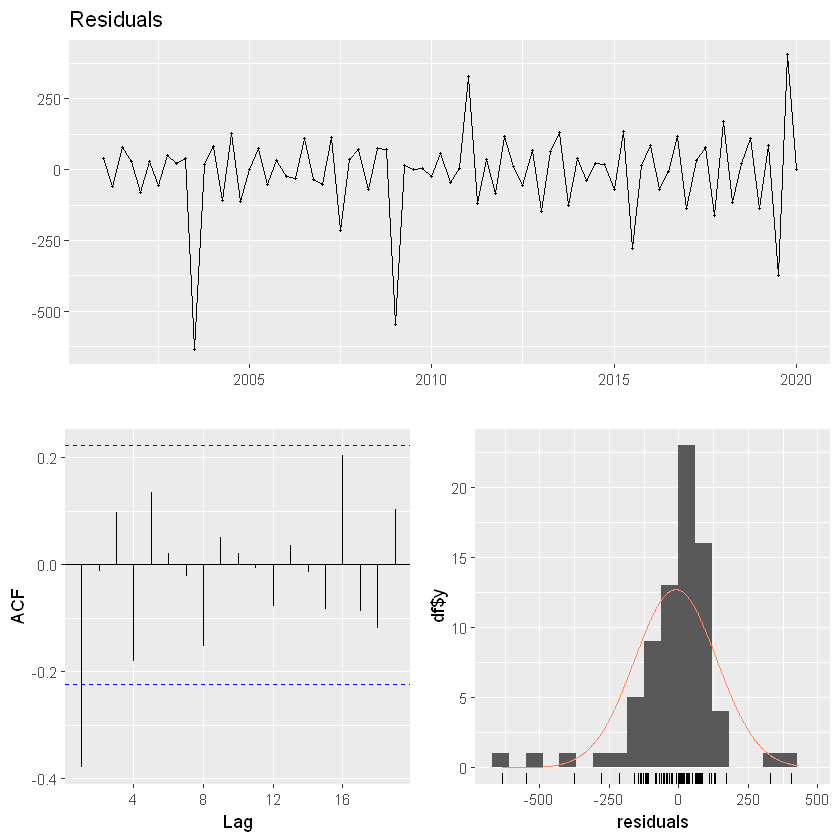

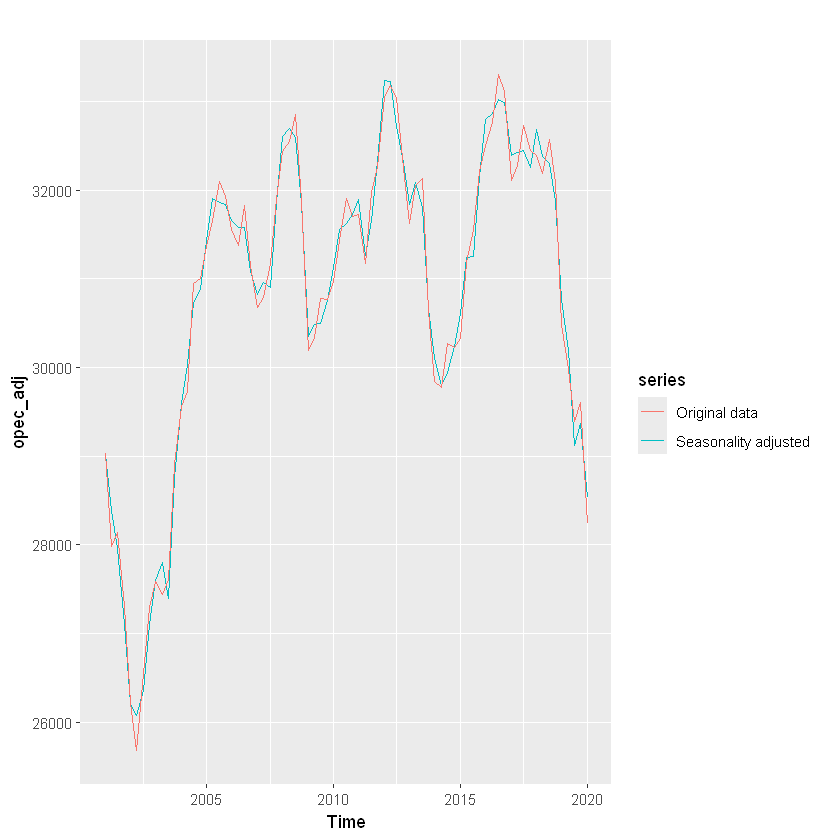

In [14]:
addWorksheet(OUT, "opec")

opec_adj <- as.data.frame(as_tibble(seas(opec, x11 = "")))
opec_adj <- cbind(ts(opec_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(opec, x11=""))
OUT %>% insertPlot(sheet = "opec", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(opec, x11="")))
OUT %>% insertPlot(sheet = "opec", startRow = 2, startCol = "J")

autoplot(opec_adj, series = "Seasonality adjusted") +
  autolayer(opec, series = "Original data")
OUT %>% insertPlot(sheet = "opec", startRow = 2, startCol = "R")

## non_opec

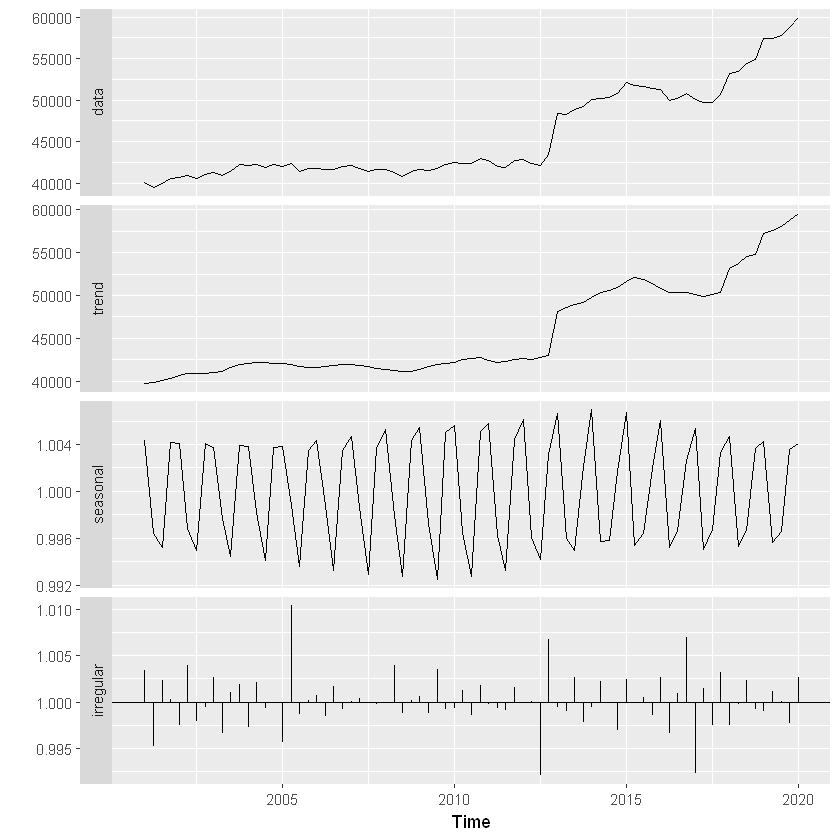


	Ljung-Box test

data:  Residuals
Q* = 29.676, df = 8, p-value = 0.0002411

Model df: 0.   Total lags used: 8



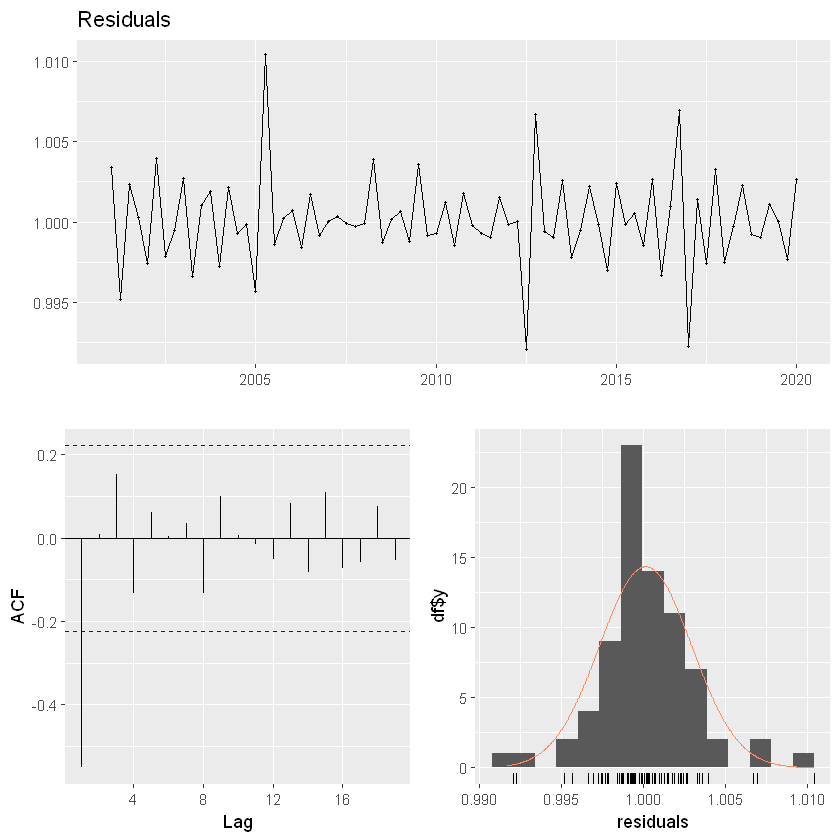

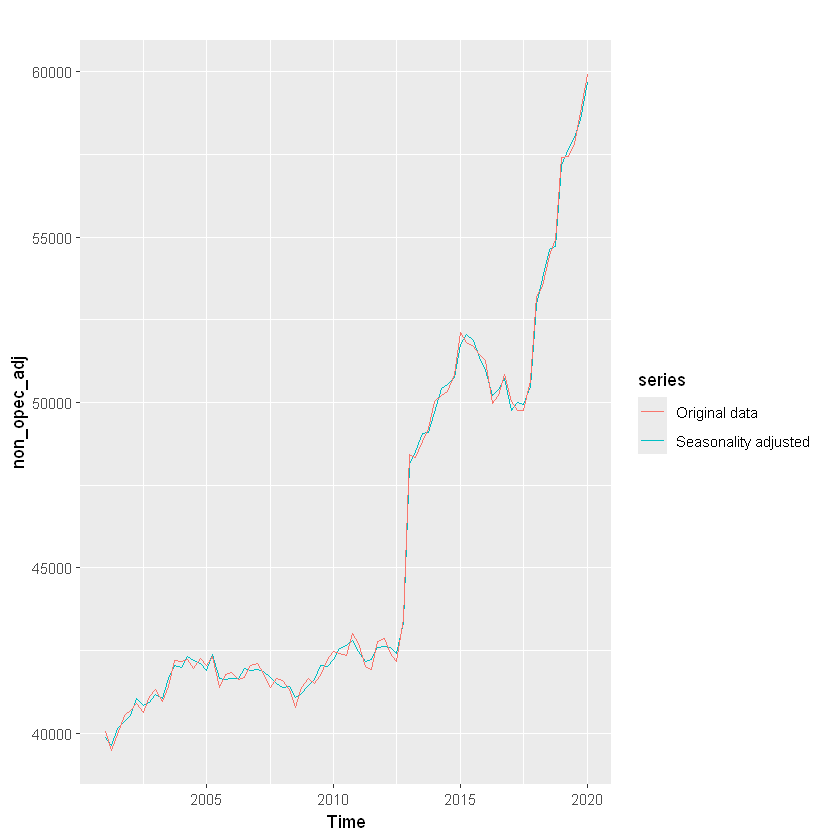

In [15]:
addWorksheet(OUT, "non_opec")

non_opec_adj <- as.data.frame(as_tibble(seas(non_opec, x11 = "")))
non_opec_adj <- cbind(ts(non_opec_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(non_opec, x11=""))
OUT %>% insertPlot(sheet = "non_opec", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(non_opec, x11="")))
OUT %>% insertPlot(sheet = "non_opec", startRow = 2, startCol = "J")

autoplot(non_opec_adj, series = "Seasonality adjusted") +
  autolayer(non_opec, series = "Original data")
OUT %>% insertPlot(sheet = "non_opec", startRow = 2, startCol = "R")

## index_cpi_us

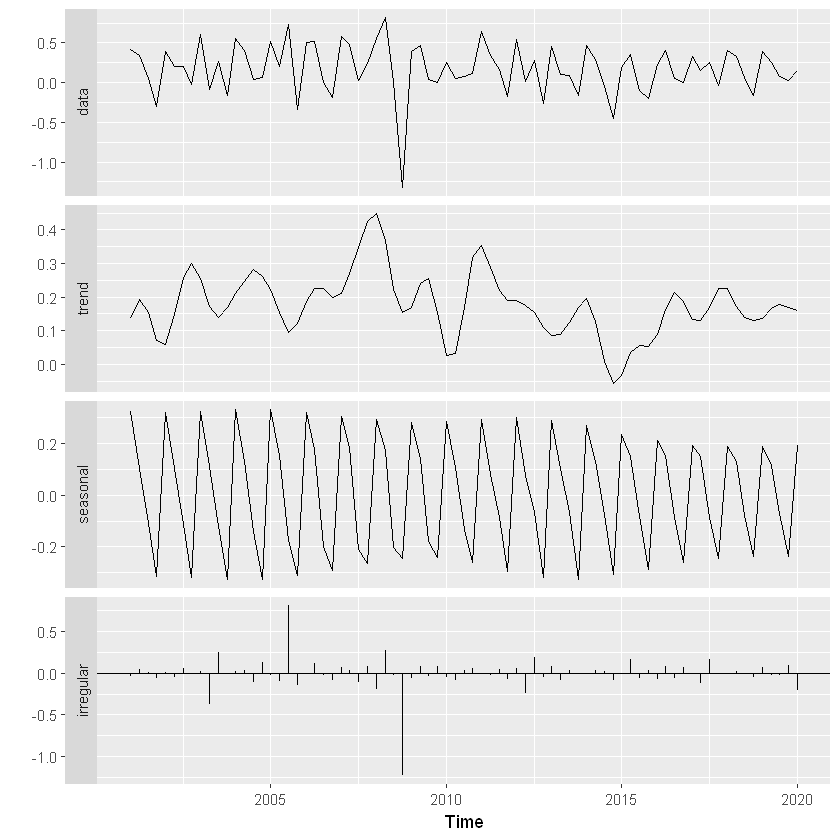


	Ljung-Box test

data:  Residuals
Q* = 7.4704, df = 8, p-value = 0.4868

Model df: 0.   Total lags used: 8



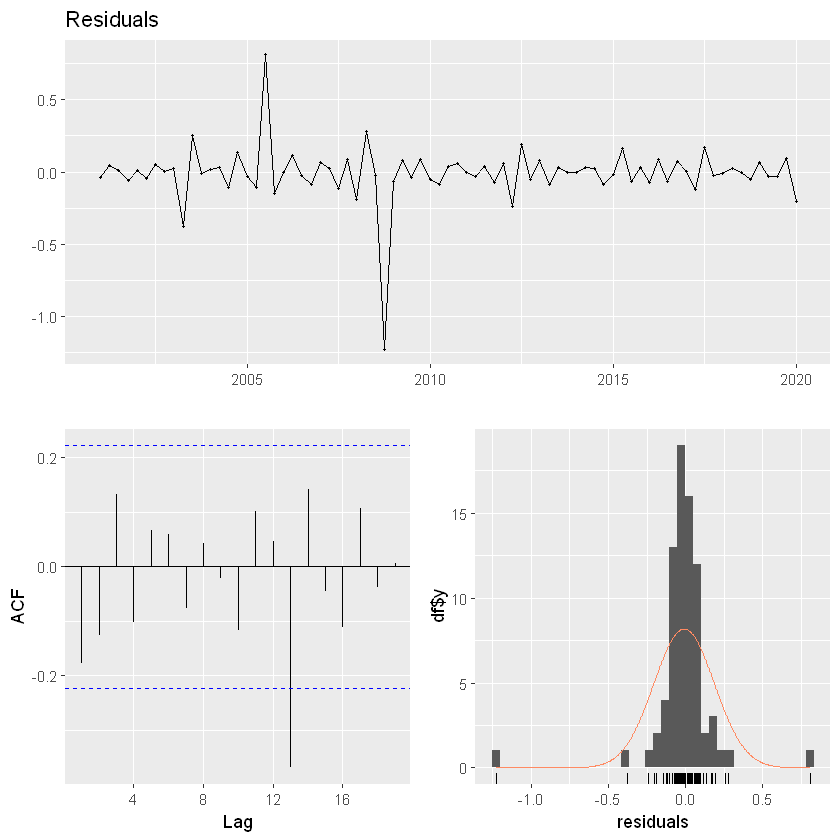

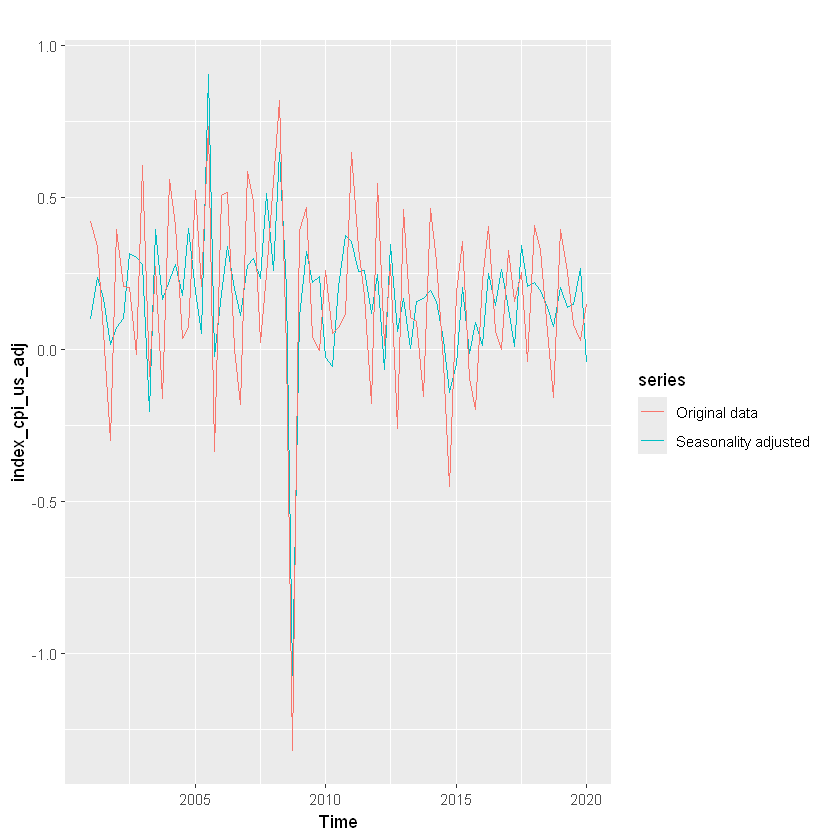

In [16]:
addWorksheet(OUT, "index_cpi_us")

index_cpi_us_adj <- as.data.frame(as_tibble(seas(index_cpi_us, x11 = "")))
index_cpi_us_adj <- cbind(ts(index_cpi_us_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(index_cpi_us, x11=""))
OUT %>% insertPlot(sheet = "index_cpi_us", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(index_cpi_us, x11="")))
OUT %>% insertPlot(sheet = "index_cpi_us", startRow = 2, startCol = "J")

autoplot(index_cpi_us_adj, series = "Seasonality adjusted") +
  autolayer(index_cpi_us, series = "Original data")
OUT %>% insertPlot(sheet = "index_cpi_us", startRow = 2, startCol = "R")


## index_energy

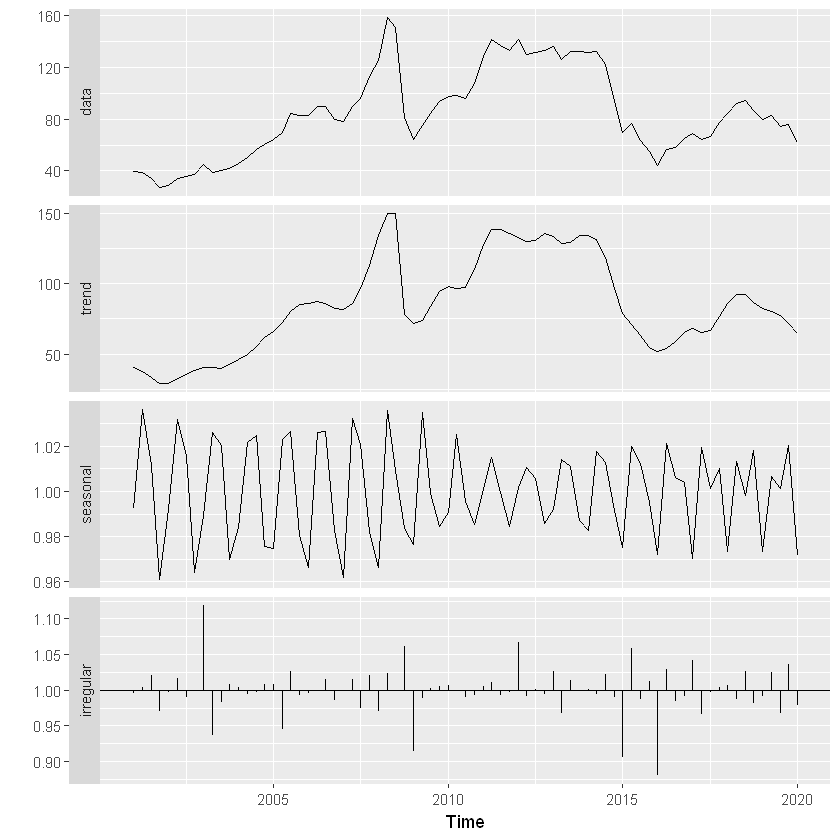


	Ljung-Box test

data:  Residuals
Q* = 21.768, df = 8, p-value = 0.005365

Model df: 0.   Total lags used: 8



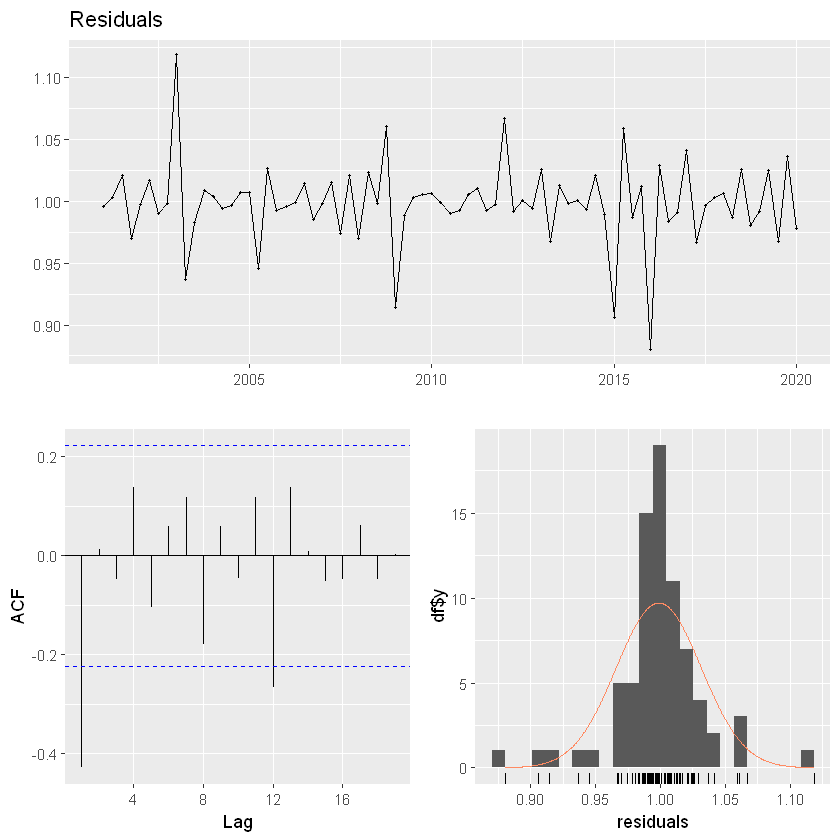

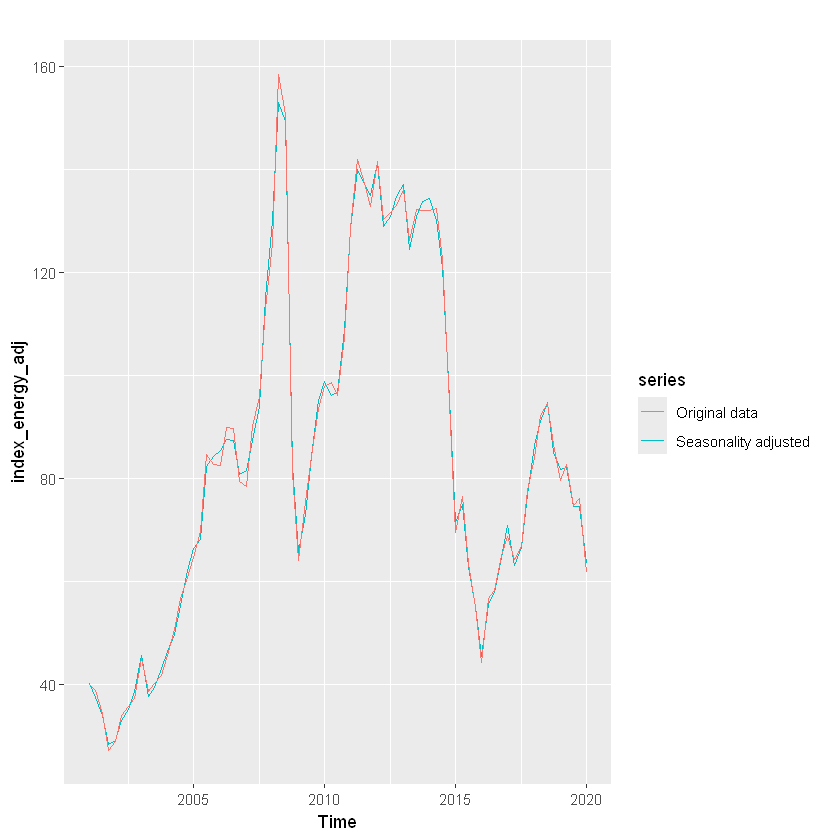

In [17]:
addWorksheet(OUT, "index_energy")

index_energy_adj <- as.data.frame(as_tibble(seas(index_energy, x11 = "")))
index_energy_adj <- cbind(ts(index_energy_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(index_energy, x11=""))
OUT %>% insertPlot(sheet = "index_energy", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(index_energy, x11="")))
OUT %>% insertPlot(sheet = "index_energy", startRow = 2, startCol = "J")

autoplot(index_energy_adj, series = "Seasonality adjusted") +
  autolayer(index_energy, series = "Original data")
OUT %>% insertPlot(sheet = "index_energy", startRow = 2, startCol = "R")


## index_metal

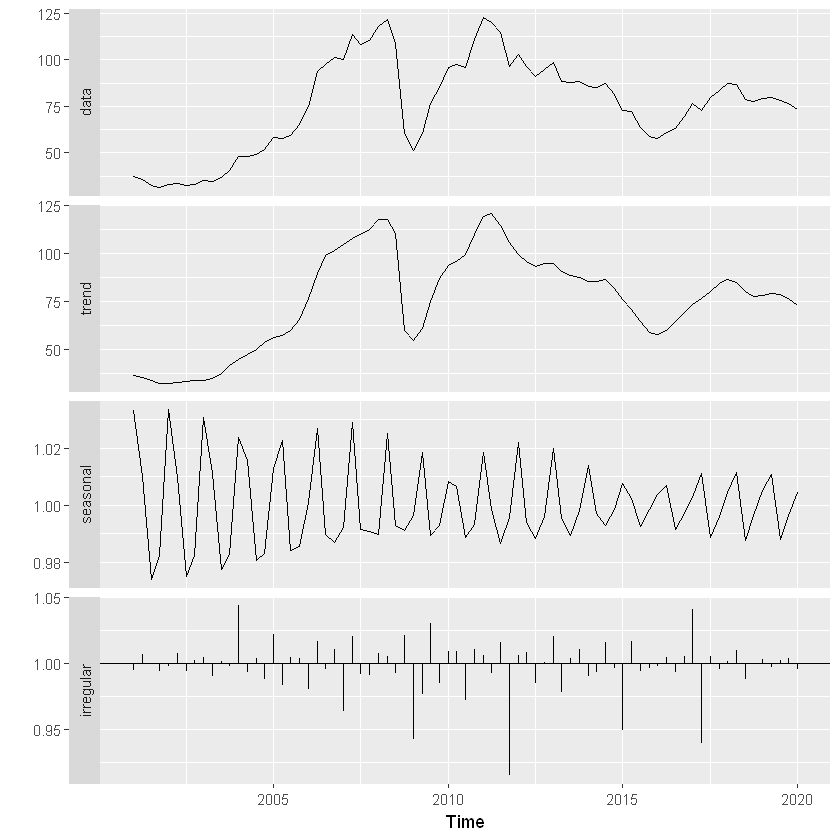


	Ljung-Box test

data:  Residuals
Q* = 19.429, df = 8, p-value = 0.01273

Model df: 0.   Total lags used: 8



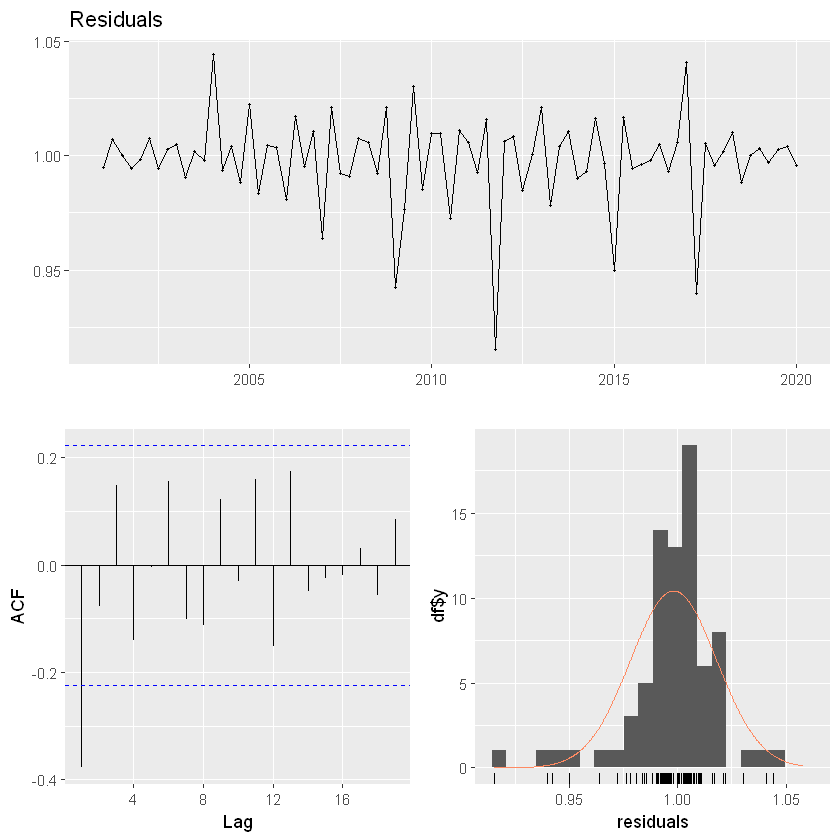

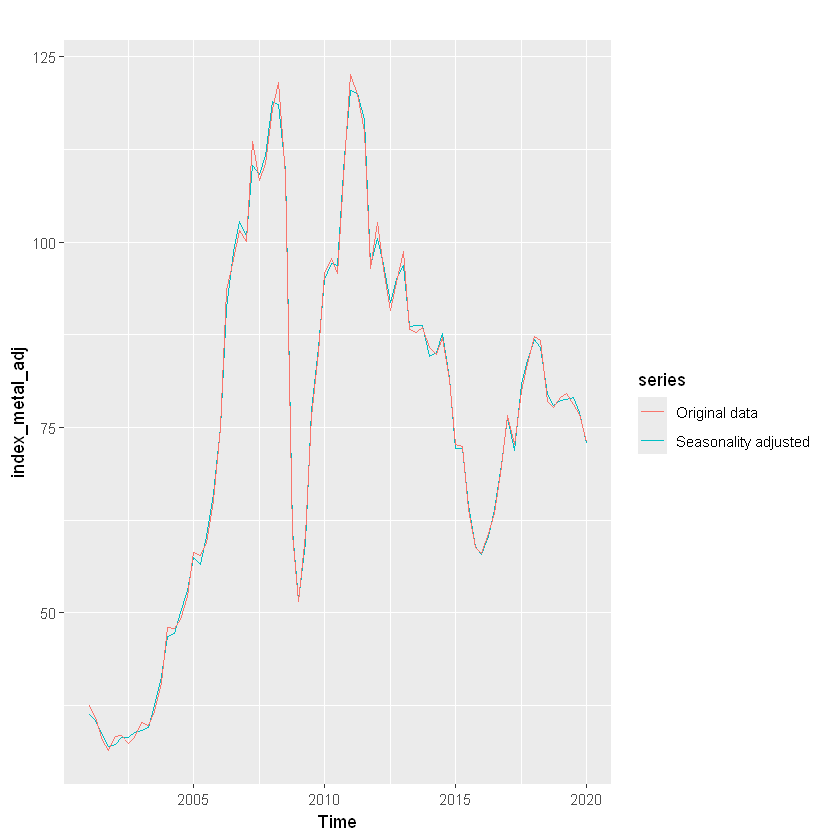

In [18]:
addWorksheet(OUT, "index_metal")

index_metal_adj <- as.data.frame(as_tibble(seas(index_metal, x11 = "")))
index_metal_adj <- cbind(ts(index_metal_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(index_metal, x11=""))
OUT %>% insertPlot(sheet = "index_metal", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(index_metal, x11="")))
OUT %>% insertPlot(sheet = "index_metal", startRow = 2, startCol = "J")

autoplot(index_metal_adj, series = "Seasonality adjusted") +
  autolayer(index_metal, series = "Original data")
OUT %>% insertPlot(sheet = "index_metal", startRow = 2, startCol = "R")


## index_precious

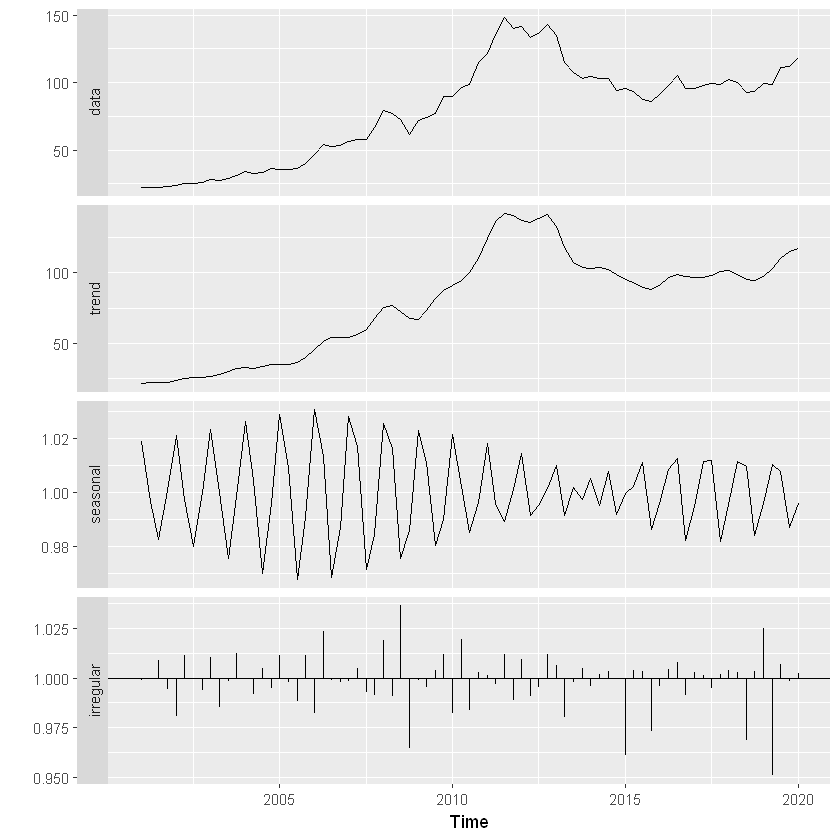


	Ljung-Box test

data:  Residuals
Q* = 32.292, df = 8, p-value = 8.257e-05

Model df: 0.   Total lags used: 8



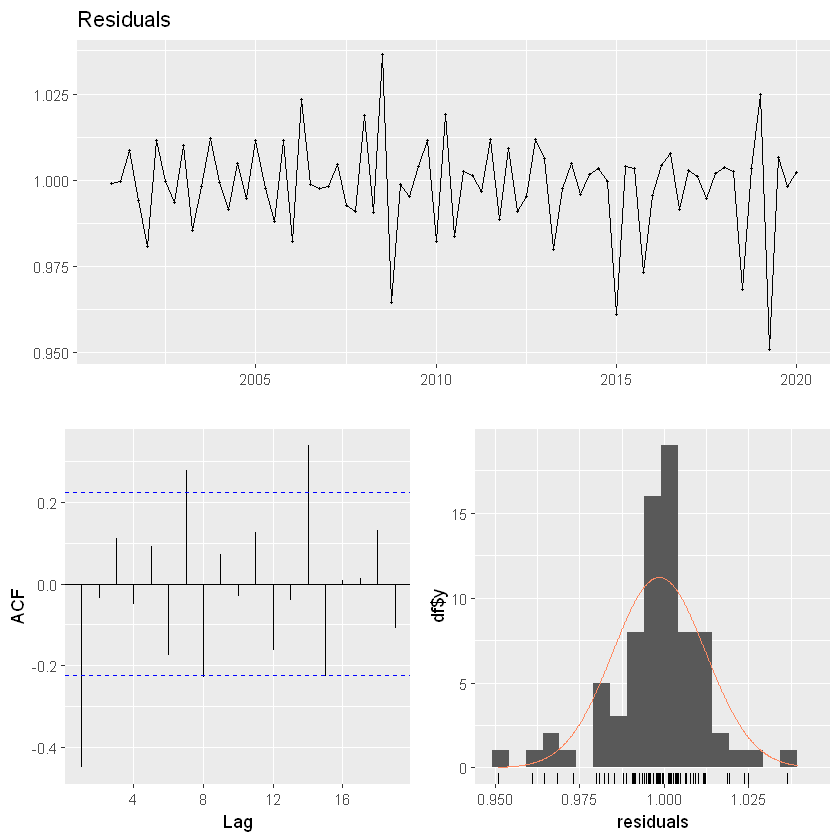

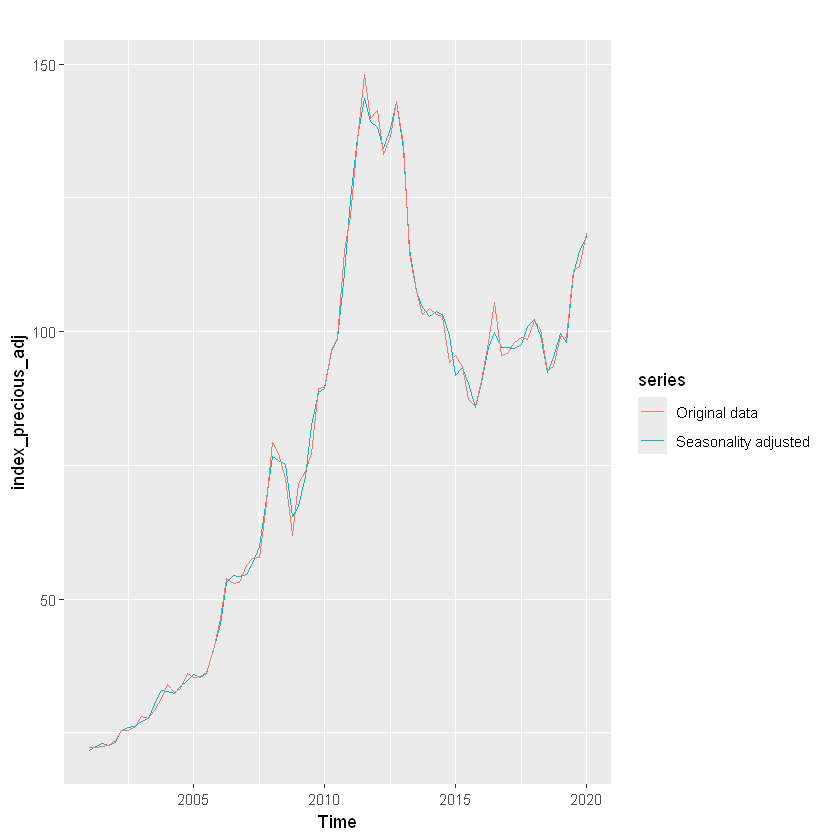

In [19]:
addWorksheet(OUT, "index_precious")

index_precious_adj <- as.data.frame(as_tibble(seas(index_precious, x11 = "")))
index_precious_adj <- cbind(ts(index_precious_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(index_precious, x11=""))
OUT %>% insertPlot(sheet = "index_precious", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(index_precious, x11="")))
OUT %>% insertPlot(sheet = "index_precious", startRow = 2, startCol = "J")

autoplot(index_precious_adj, series = "Seasonality adjusted") +
  autolayer(index_precious, series = "Original data")
OUT %>% insertPlot(sheet = "index_precious", startRow = 2, startCol = "R")

## del_supply_nonopec

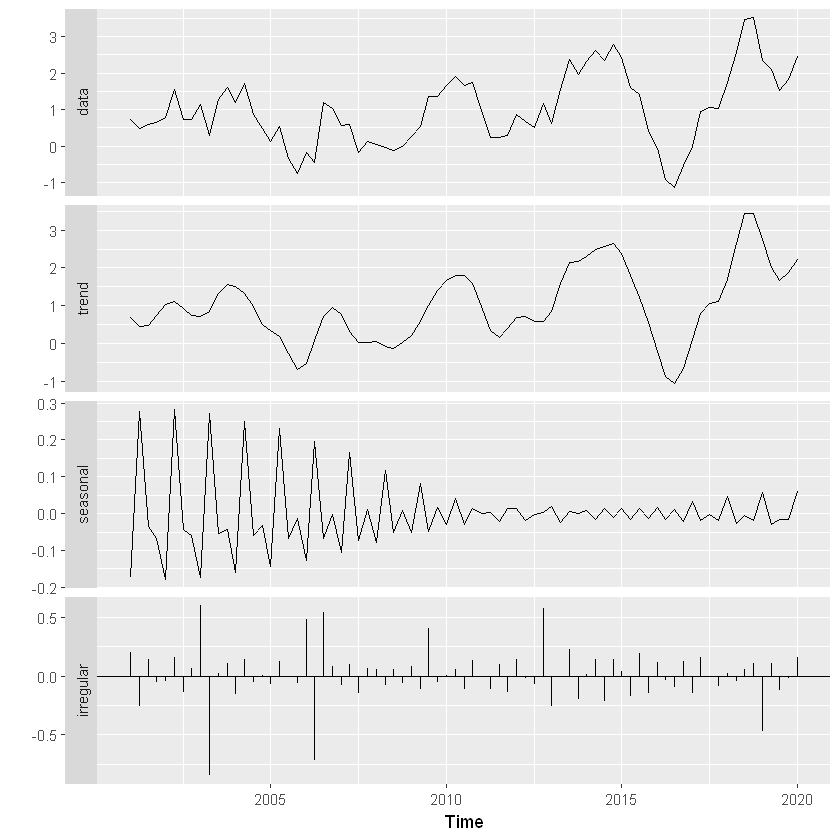


	Ljung-Box test

data:  Residuals
Q* = 52.467, df = 8, p-value = 1.368e-08

Model df: 0.   Total lags used: 8



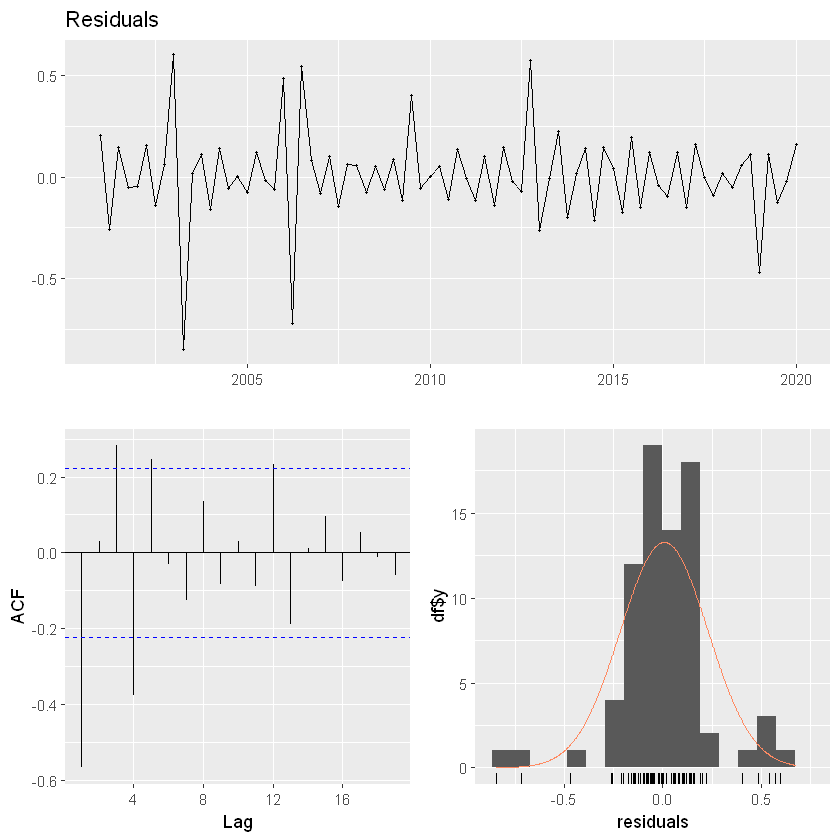

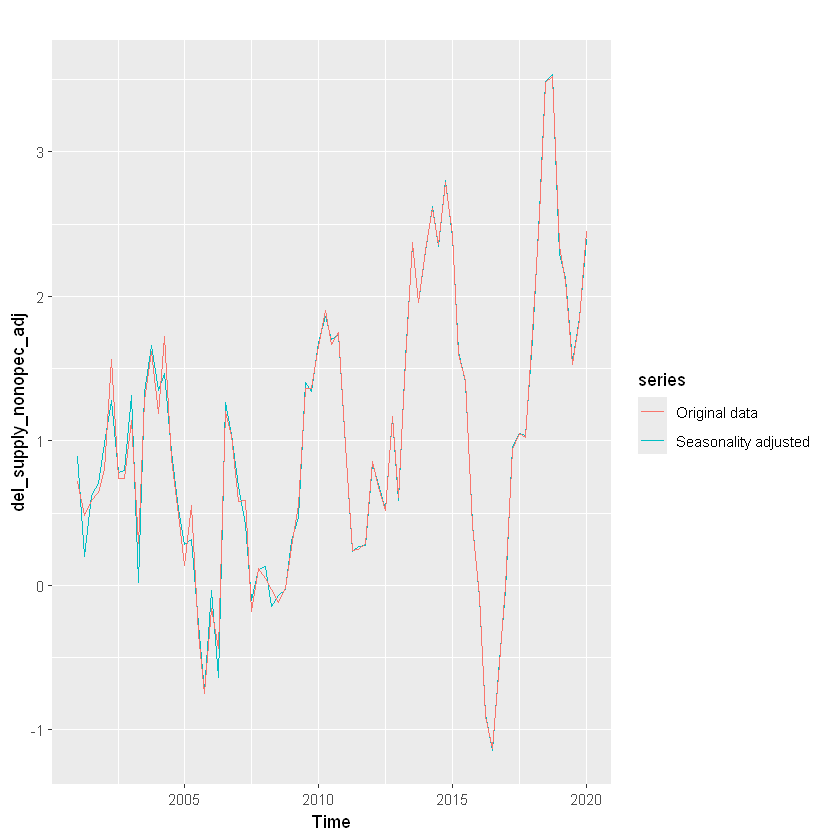

In [20]:
addWorksheet(OUT, "del_supply_nonopec")

del_supply_nonopec_adj <- as.data.frame(as_tibble(seas(del_supply_nonopec, x11 = "")))
del_supply_nonopec_adj <- cbind(ts(del_supply_nonopec_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(del_supply_nonopec, x11=""))
OUT %>% insertPlot(sheet = "del_supply_nonopec", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(del_supply_nonopec, x11="")))
OUT %>% insertPlot(sheet = "del_supply_nonopec", startRow = 2, startCol = "J")

autoplot(del_supply_nonopec_adj, series = "Seasonality adjusted") +
  autolayer(del_supply_nonopec, series = "Original data")
OUT %>% insertPlot(sheet = "del_supply_nonopec", startRow = 2, startCol = "R")

## del_cap_per

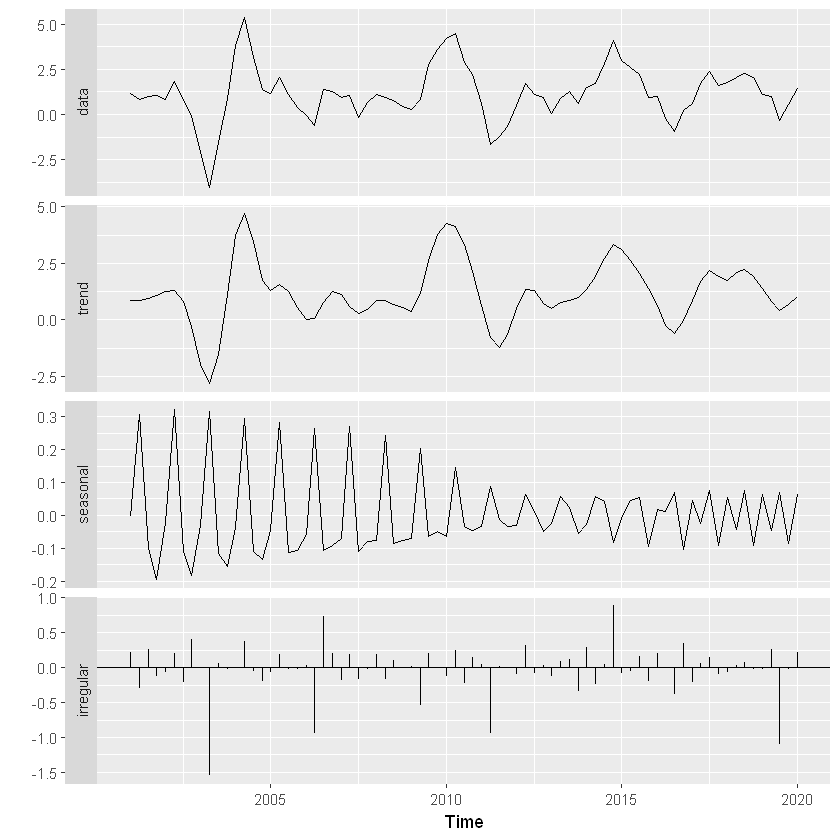


	Ljung-Box test

data:  Residuals
Q* = 24.735, df = 8, p-value = 0.001724

Model df: 0.   Total lags used: 8



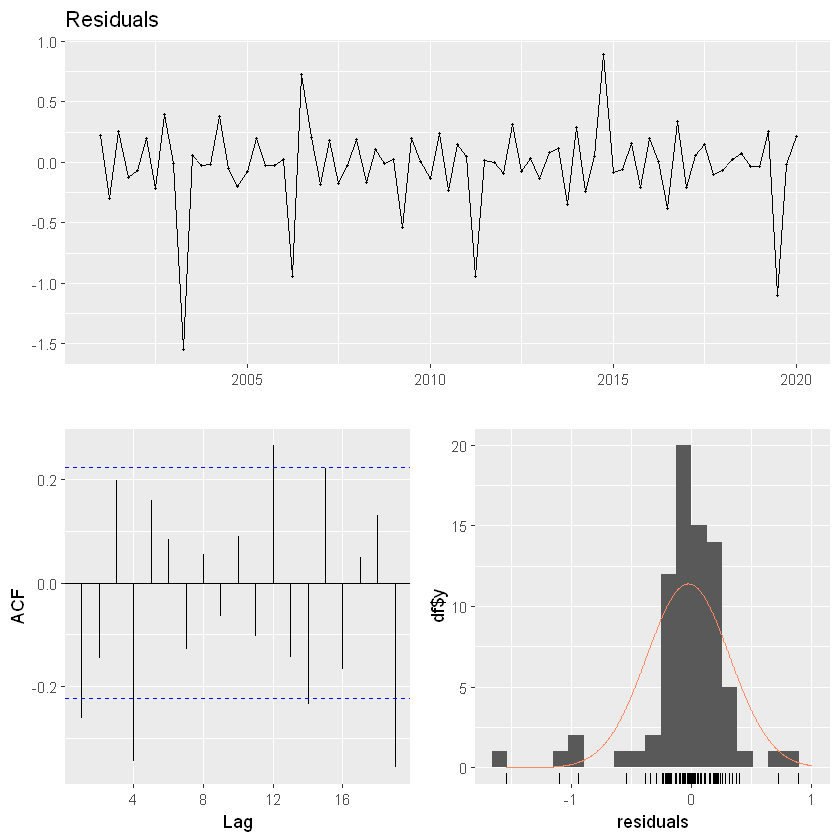

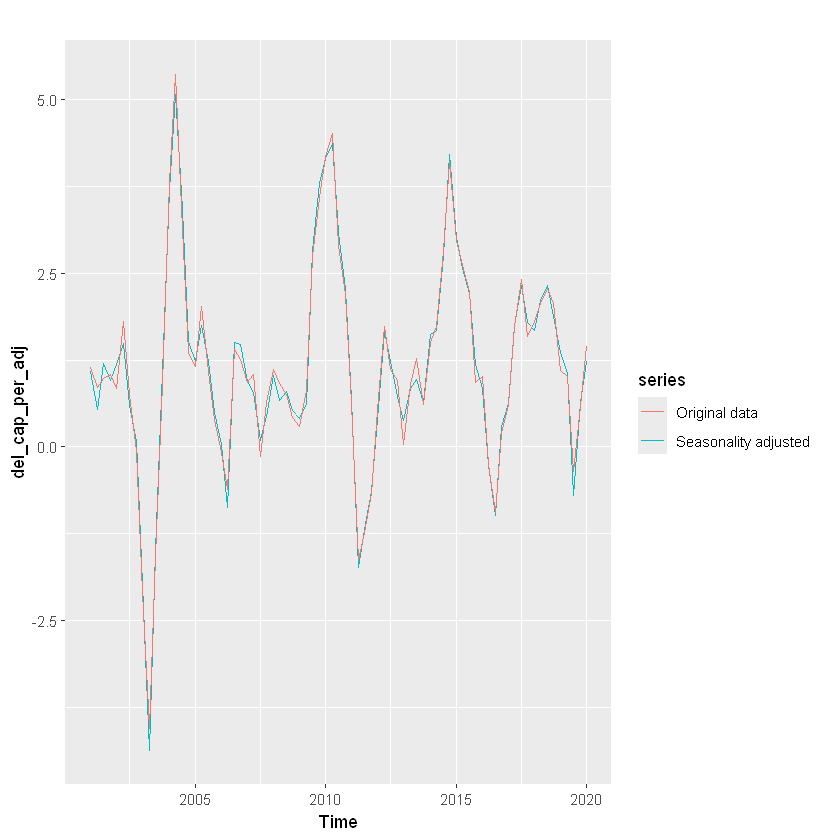

In [21]:
addWorksheet(OUT, "del_cap_per")

del_cap_per_adj <- as.data.frame(as_tibble(seas(del_cap_per, x11 = "")))
del_cap_per_adj <- cbind(ts(del_cap_per_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(del_cap_per, x11=""))
OUT %>% insertPlot(sheet = "del_cap_per", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(del_cap_per, x11="")))
OUT %>% insertPlot(sheet = "del_cap_per", startRow = 2, startCol = "J")

autoplot(del_cap_per_adj, series = "Seasonality adjusted") +
  autolayer(del_cap_per, series = "Original data")
OUT %>% insertPlot(sheet = "del_cap_per", startRow = 2, startCol = "R")

## del_world_gdp_per

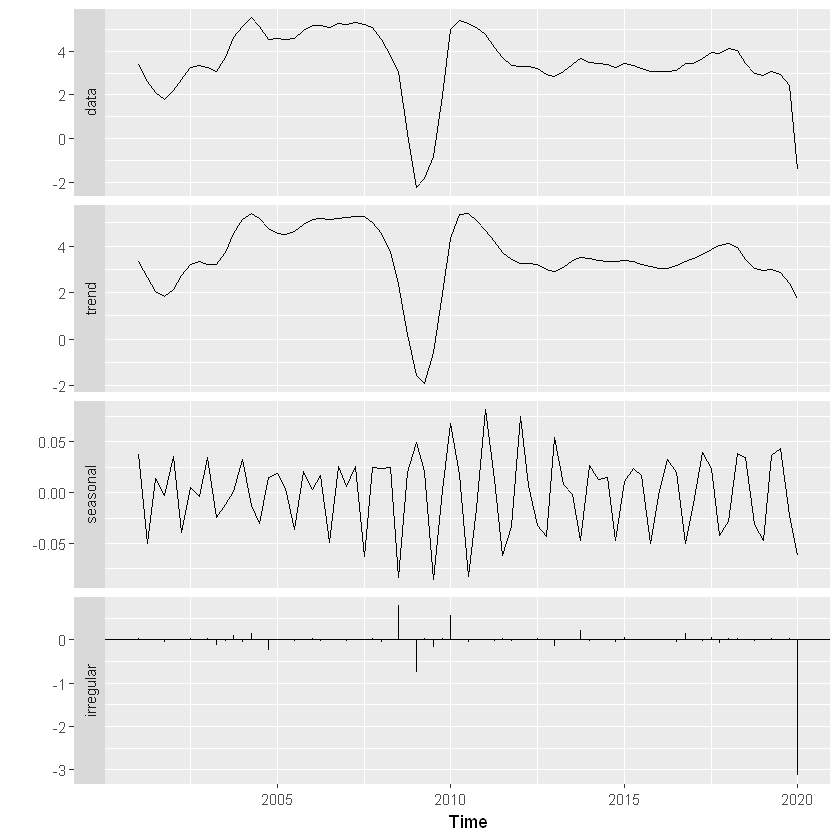


	Ljung-Box test

data:  Residuals
Q* = 0.77879, df = 8, p-value = 0.9993

Model df: 0.   Total lags used: 8



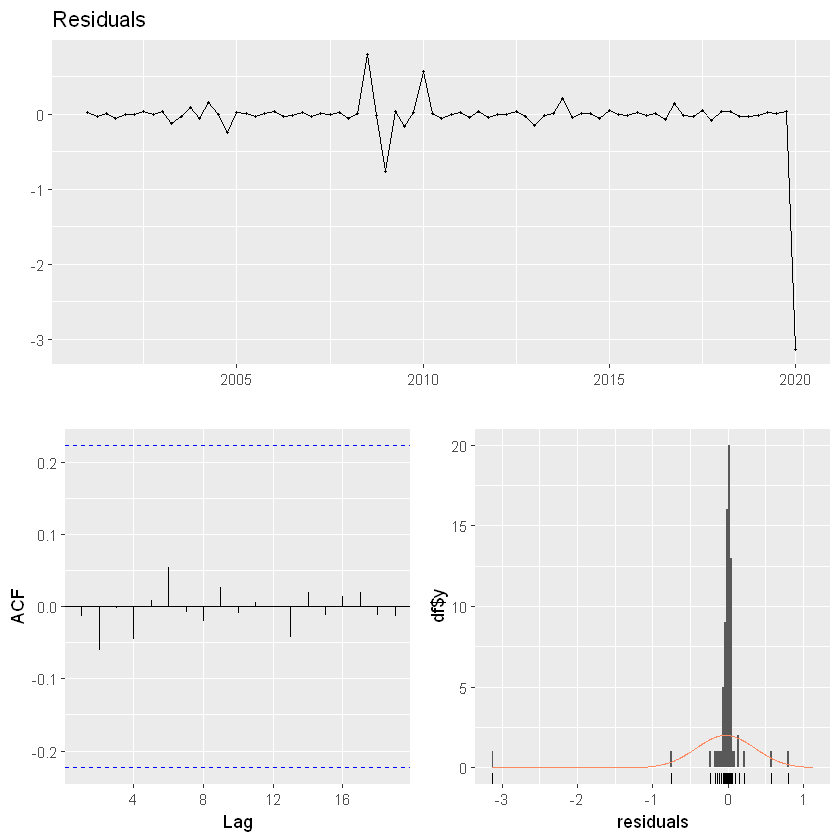

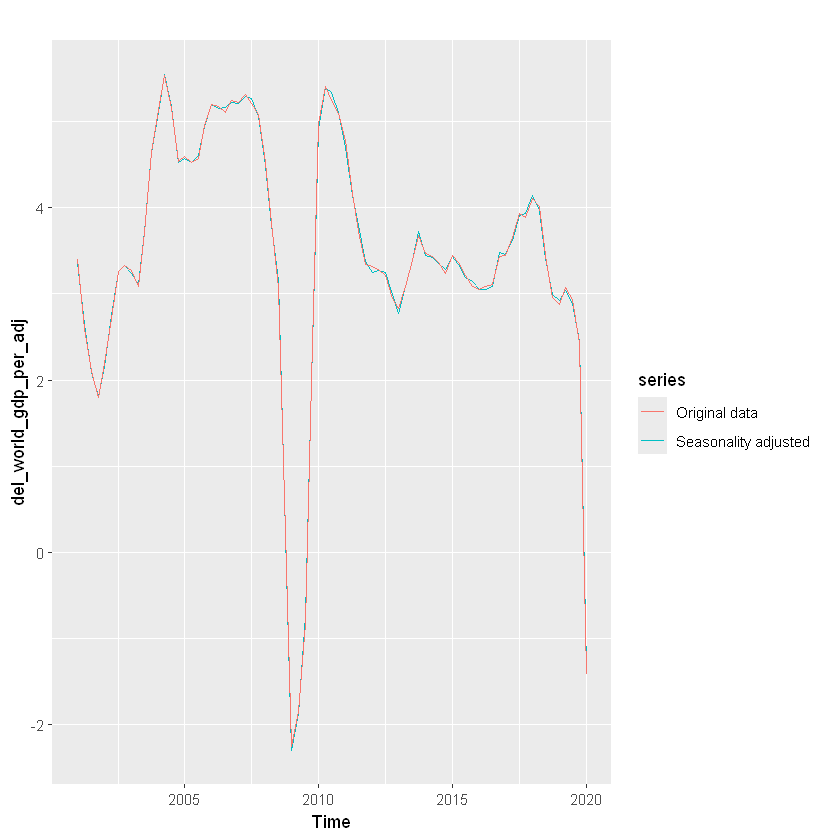

In [22]:
addWorksheet(OUT, "del_world_gdp_per")

del_world_gdp_per_adj <- as.data.frame(as_tibble(seas(del_world_gdp_per, x11 = "")))
del_world_gdp_per_adj <- cbind(ts(del_world_gdp_per_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(del_world_gdp_per, x11=""))
OUT %>% insertPlot(sheet = "del_world_gdp_per", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(del_world_gdp_per, x11="")))
OUT %>% insertPlot(sheet = "del_world_gdp_per", startRow = 2, startCol = "J")

autoplot(del_world_gdp_per_adj, series = "Seasonality adjusted") +
  autolayer(del_world_gdp_per, series = "Original data")
OUT %>% insertPlot(sheet = "del_world_gdp_per", startRow = 2, startCol = "R")

## del_supply_saudi

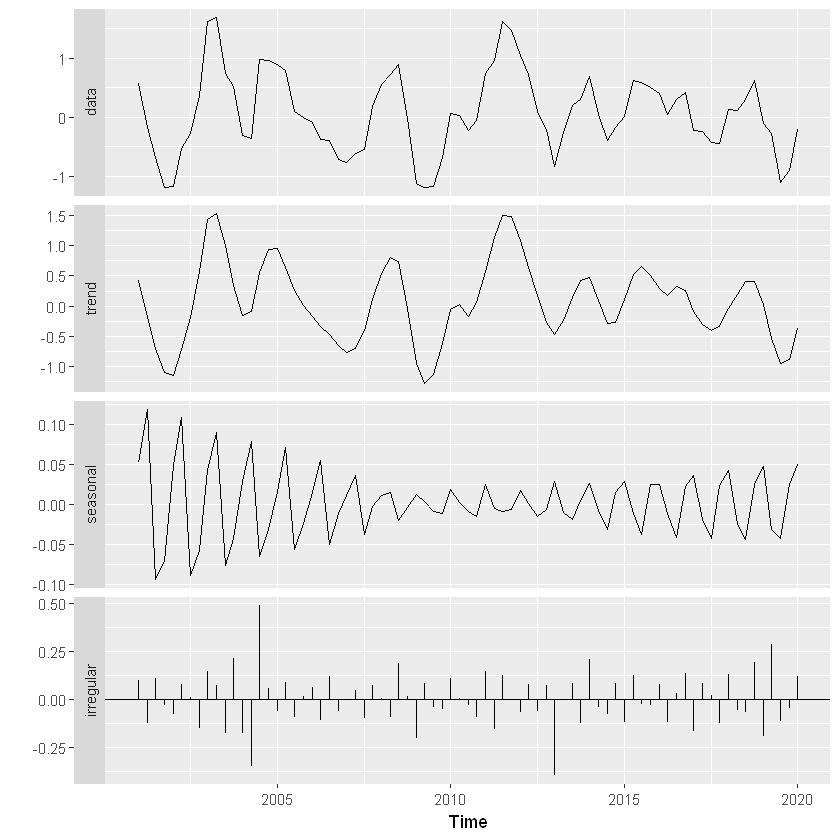


	Ljung-Box test

data:  Residuals
Q* = 62.321, df = 8, p-value = 1.63e-10

Model df: 0.   Total lags used: 8



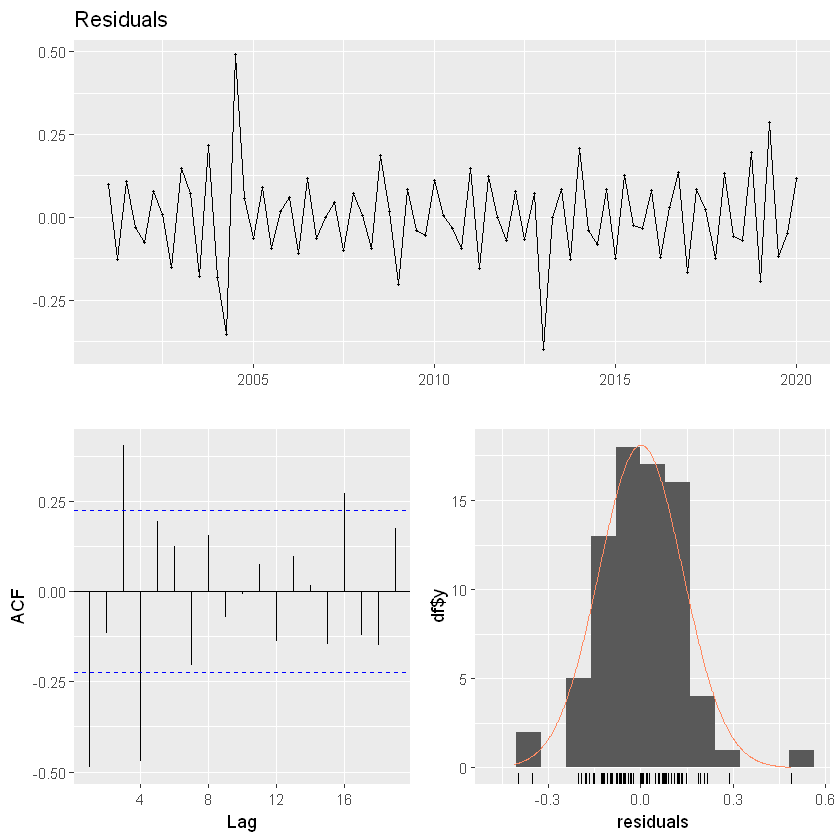

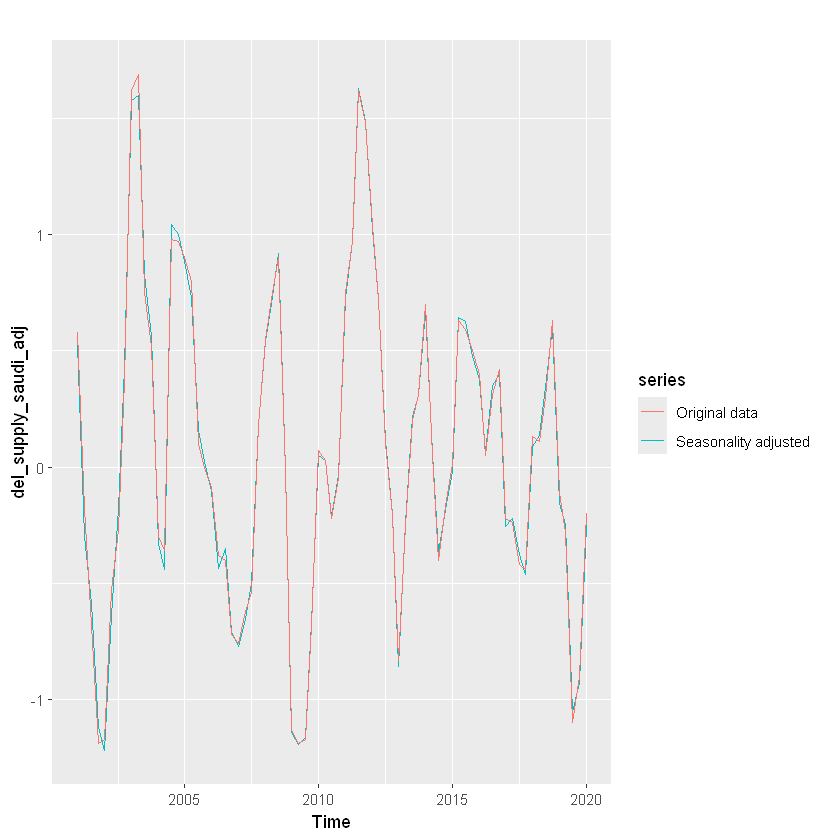

In [23]:
addWorksheet(OUT, "del_supply_saudi")

del_supply_saudi_adj <- as.data.frame(as_tibble(seas(del_supply_saudi, x11 = "")))
del_supply_saudi_adj <- cbind(ts(del_supply_saudi_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(del_supply_saudi, x11=""))
OUT %>% insertPlot(sheet = "del_supply_saudi", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(del_supply_saudi, x11="")))
OUT %>% insertPlot(sheet = "del_supply_saudi", startRow = 2, startCol = "J")

autoplot(del_supply_saudi_adj, series = "Seasonality adjusted") +
  autolayer(del_supply_saudi, series = "Original data")
OUT %>% insertPlot(sheet = "del_supply_saudi", startRow = 2, startCol = "R")

## opec_spare_capacity

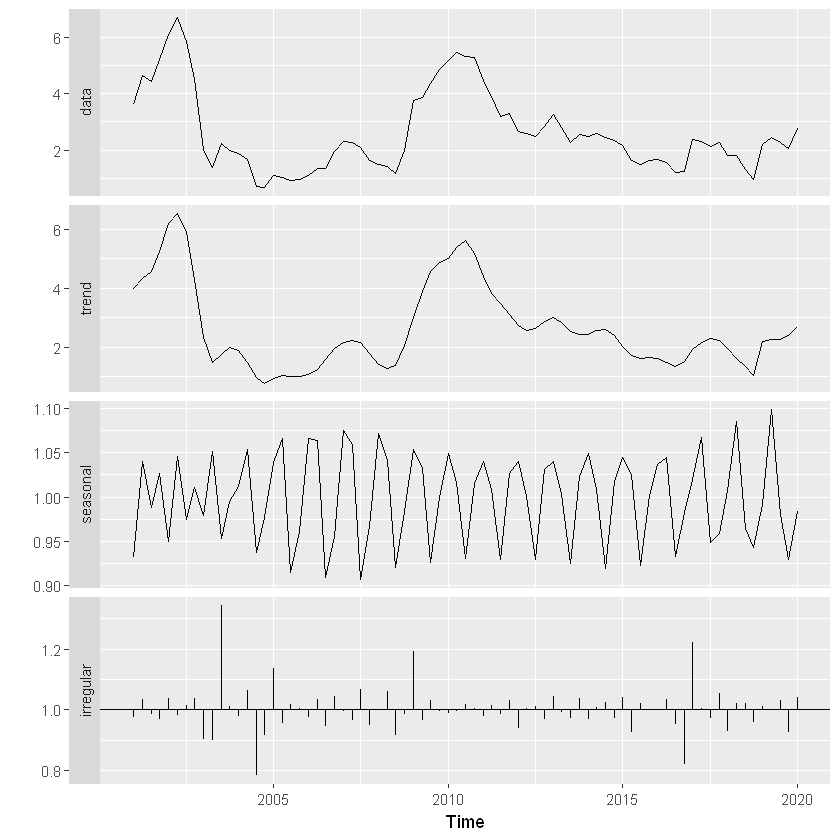


	Ljung-Box test

data:  Residuals
Q* = 40.452, df = 8, p-value = 2.639e-06

Model df: 0.   Total lags used: 8



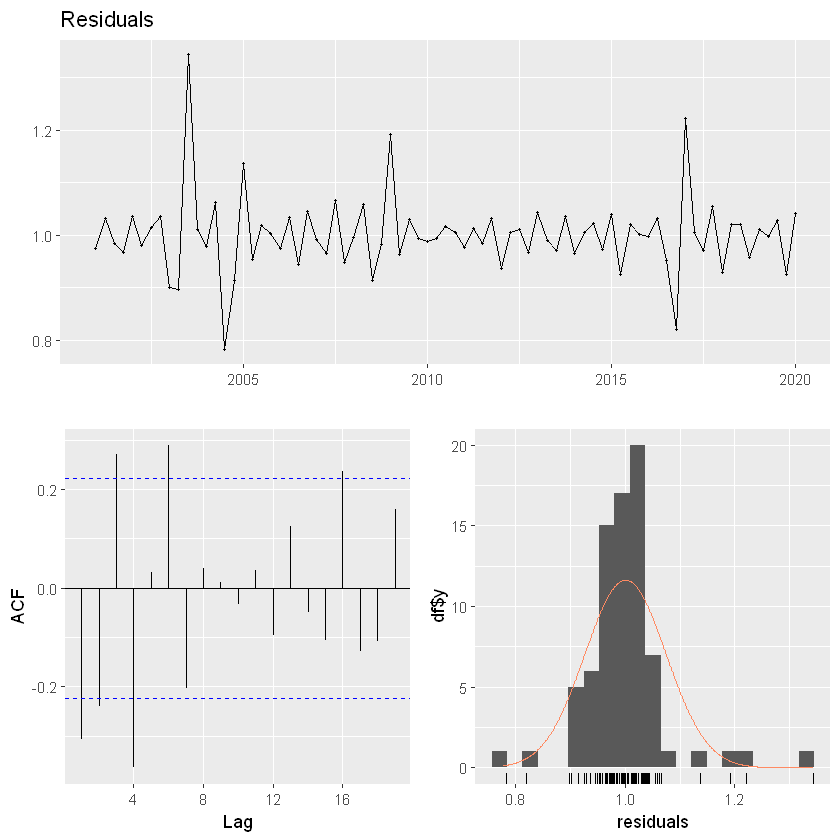

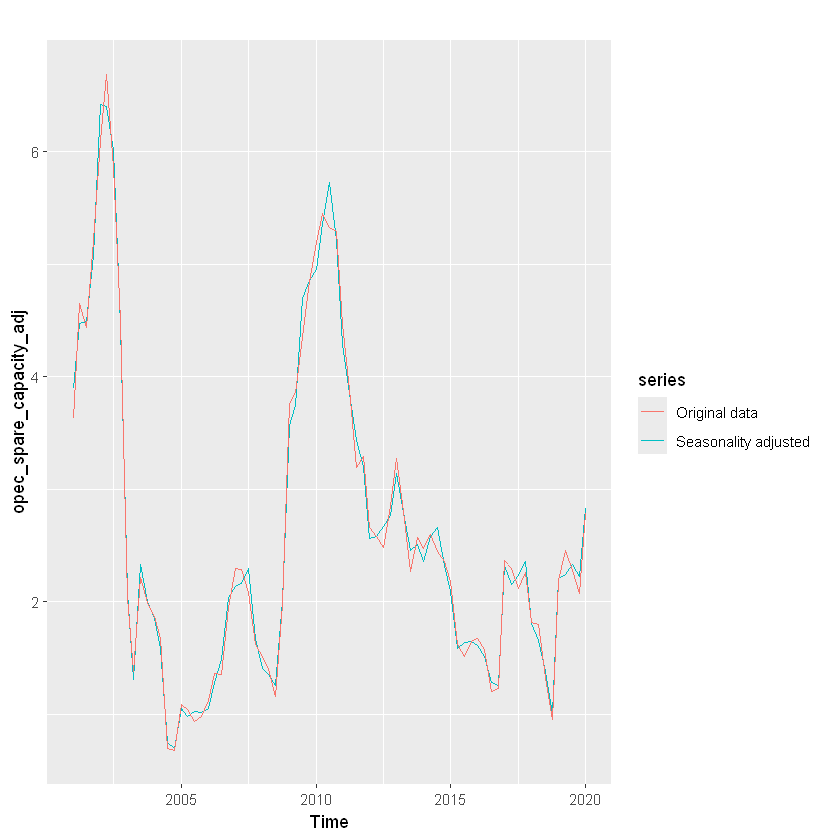

In [24]:
addWorksheet(OUT, "opec_spare_capacity")

opec_spare_capacity_adj <- as.data.frame(as_tibble(seas(opec_spare_capacity, x11 = "")))
opec_spare_capacity_adj <- cbind(ts(opec_spare_capacity_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(opec_spare_capacity, x11=""))
OUT %>% insertPlot(sheet = "opec_spare_capacity", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(opec_spare_capacity, x11="")))
OUT %>% insertPlot(sheet = "opec_spare_capacity", startRow = 2, startCol = "J")

autoplot(opec_spare_capacity_adj, series = "Seasonality adjusted") +
  autolayer(opec_spare_capacity, series = "Original data")
OUT %>% insertPlot(sheet = "opec_spare_capacity", startRow = 2, startCol = "R")

## oecd_inventory

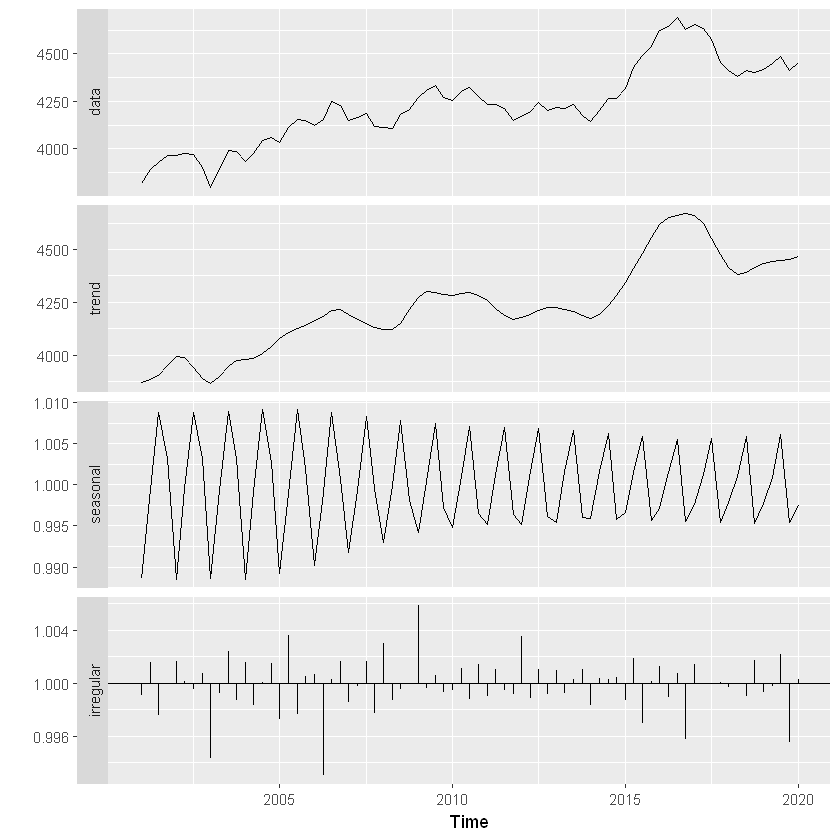


	Ljung-Box test

data:  Residuals
Q* = 21.94, df = 8, p-value = 0.005028

Model df: 0.   Total lags used: 8



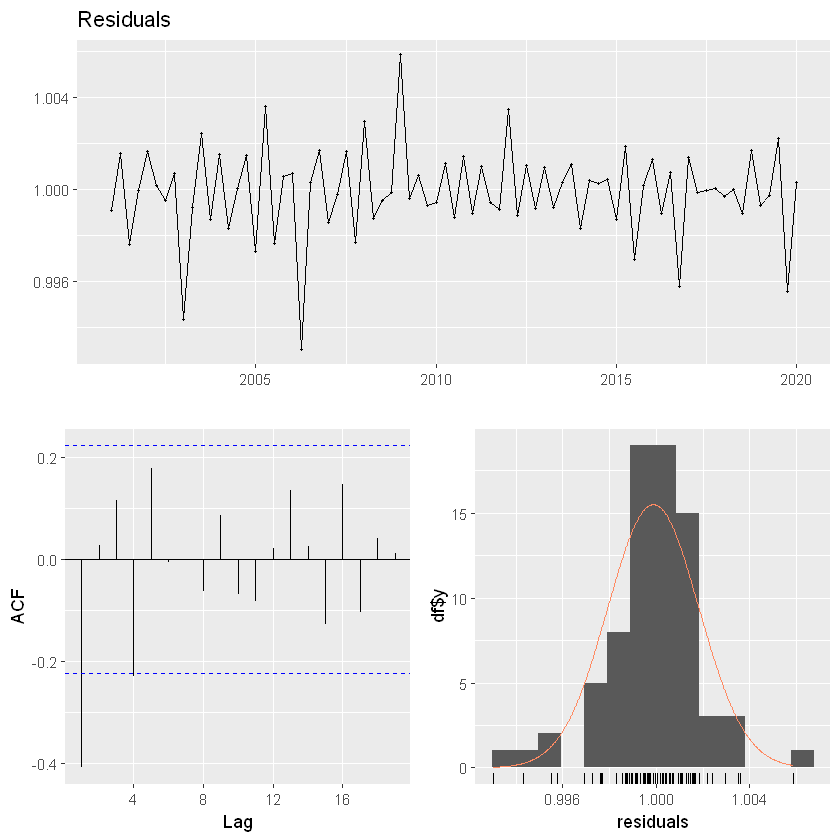

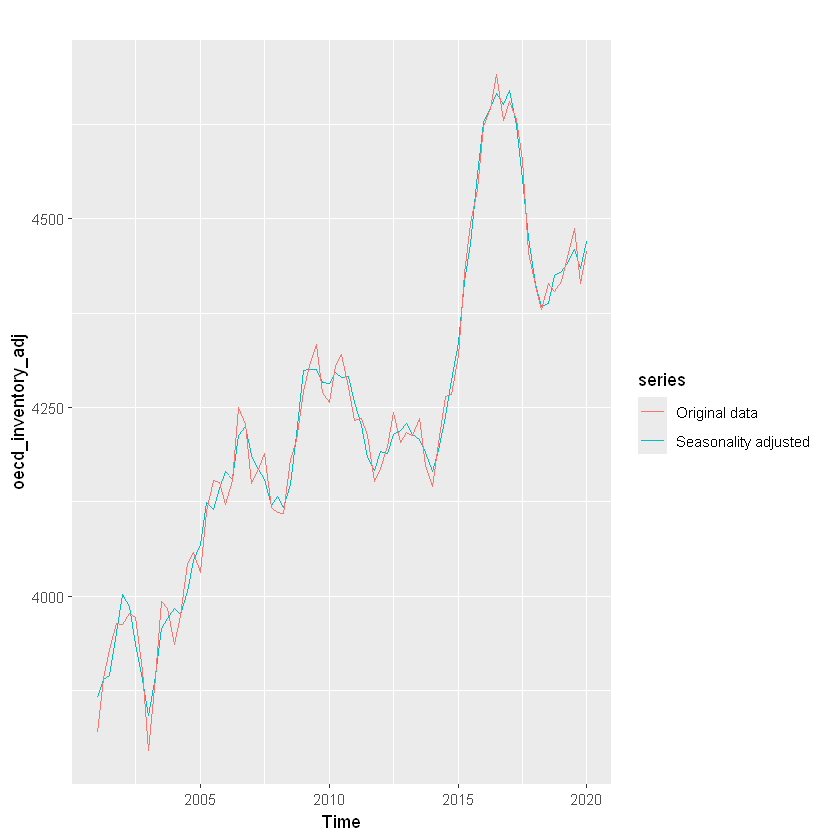

In [25]:
addWorksheet(OUT, "oecd_inventory")

oecd_inventory_adj <- as.data.frame(as_tibble(seas(oecd_inventory, x11 = "")))
oecd_inventory_adj <- cbind(ts(oecd_inventory_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(oecd_inventory, x11=""))
OUT %>% insertPlot(sheet = "oecd_inventory", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(oecd_inventory, x11="")))
OUT %>% insertPlot(sheet = "oecd_inventory", startRow = 2, startCol = "J")

autoplot(oecd_inventory_adj, series = "Seasonality adjusted") +
  autolayer(oecd_inventory, series = "Original data")
OUT %>% insertPlot(sheet = "oecd_inventory", startRow = 2, startCol = "R")

## del_world_consump

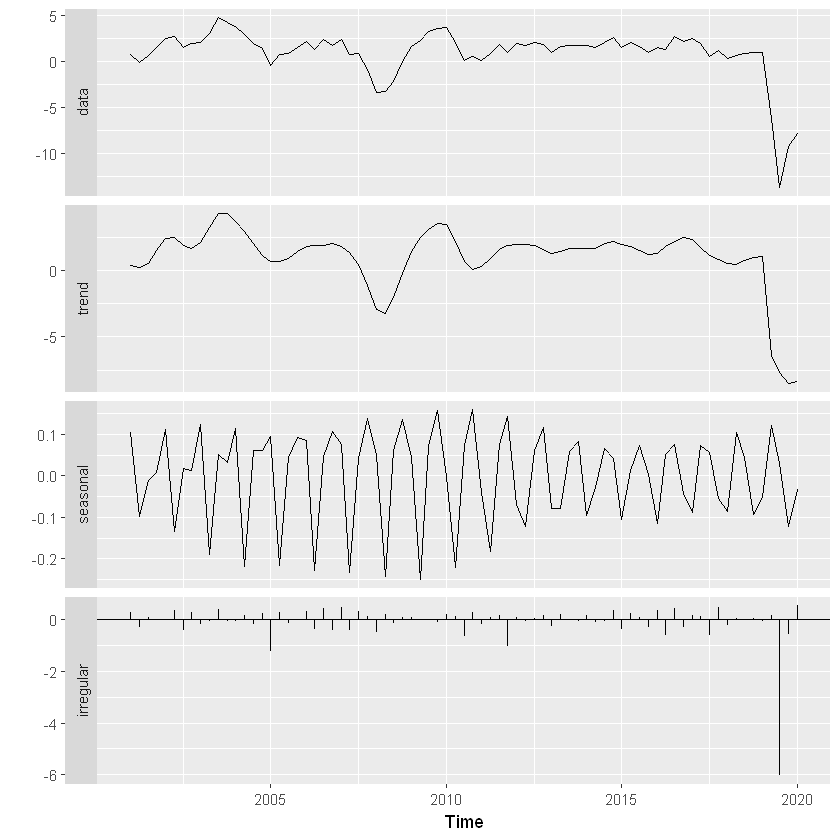


	Ljung-Box test

data:  Residuals
Q* = 1.9786, df = 8, p-value = 0.9817

Model df: 0.   Total lags used: 8



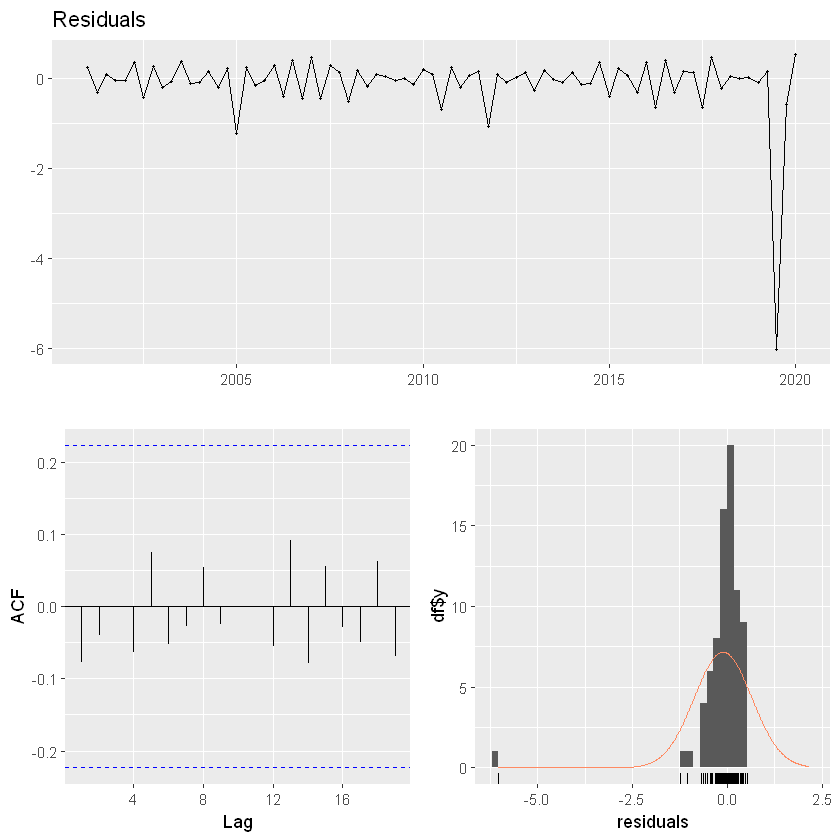

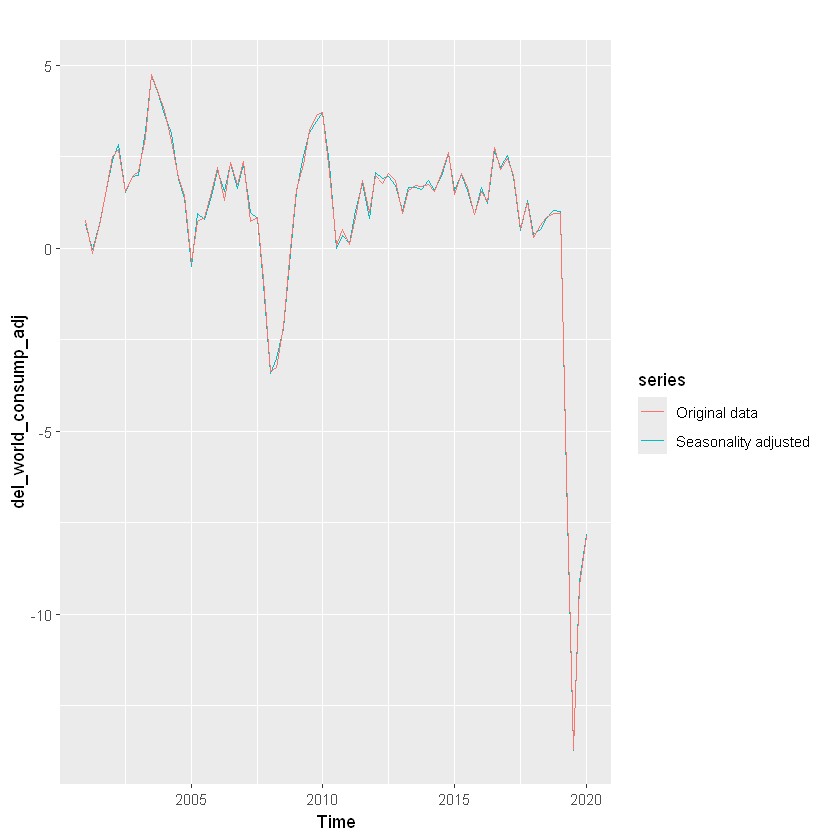

In [26]:
addWorksheet(OUT, "del_world_consump")

del_world_consump_adj <- as.data.frame(as_tibble(seas(del_world_consump, x11 = "")))
del_world_consump_adj <- cbind(ts(del_world_consump_adj[2], start = 2001, end = 2020, frequency =4))

autoplot(seas(del_world_consump, x11=""))
OUT %>% insertPlot(sheet = "del_world_consump", startRow = 2, startCol = "B")

checkresiduals(remainder(seas(del_world_consump, x11="")))
OUT %>% insertPlot(sheet = "del_world_consump", startRow = 2, startCol = "J")

autoplot(del_world_consump_adj, series = "Seasonality adjusted") +
  autolayer(del_world_consump, series = "Original data")
OUT %>% insertPlot(sheet = "del_world_consump", startRow = 2, startCol = "R")

# Exporting the plots to an excel workbook called sea_plots

In [27]:
# saveWorkbook(OUT, "C:/Users/asifr/OneDrive - State of New Mexico/Documents/Project Oil Price/Outputs/sea_plots.xlsx", overwrite = TRUE)
saveWorkbook(OUT, "C:/Users/asifr/OneDrive - The Pennsylvania State University/Documents/GitHub/Project-Oil-Price/Outputs/sea_plots.xlsx", overwrite = TRUE)